# Product Quantization

In [ ]:
import pandas as pd

In [ ]:
# Load data
df = pd.read_json("job_postings_prepped.json")

In [ ]:
# Data Exploration
# print(df.info())
print(df.head())
# print(df.shape)

# Data Analysis
print("Dimension of the Vector: ", len(df['Vector'][0]))


                                                Data  \
0  Licensed Insurance Agent While many industries...   
1  Sales Manager Are dynamic creative marketing p...   
2  Model Risk Auditor Join Us Model Risk Auditor ...   
3  Business Manager Business ManagerFirst Baptist...   
4  NY Studio Assistant YOU COULD BE ONE OF THE MA...   

                                              Vector  
0  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
Dimension of the Vector:  105248


## Initial Memory Size

In [ ]:
vector_dimension = len(df['Vector'][0])
vector_size = df.memory_usage(deep=True)['Vector'] 
print("Vector Dimension: ", vector_dimension)
print("Vector Storage Size (MB):")
print( df.memory_usage(deep=True) / 1024**2 )

Vector Dimension:  105248
Vector Storage Size (MB):
Index         0.625137
Data         86.682539
Vector    13651.414261
dtype: float64


# Product Quantization 
Product Quatization is a method to reduce the memory usage of the codebook.
The idea is to split the codebook into sub-codebooks and quantize the data into sub-vectors.
The sub-vectors are then quantized into sub-codebooks.
The sub-codebook indices are then concatenated to form the final codebook index.


In [ ]:
# Import Libraries
import nanopq 
import numpy as np

## Preprocessing the data
The data required is preprocessed and stored in a file. To use the data, loading the file is done to prevent unnecessary preprocessing time

In [ ]:
# Import Libraries vectorizer

# vectors data type
print("Vector Type: ", type(df['Vector'][0]))
X = np.array(df['Vector'].values.tolist(), dtype=np.float32)

# Save the X vector
np.save("PQ/X.npy", X)

print("X Shape: ", X.shape)
print("X Vector Type: ", type(X))

Vector Type:  <class 'list'>


X Shape:  (15885, 105248)
X Vector Type:  <class 'numpy.ndarray'>


In [ ]:
import pickle
import nanopq

def train_fit_pq(M, Ks, X):
    # Initialize the PQ encoder (M=sub-spaces, K=Centroids)
    pq = nanopq.PQ(M=M, Ks=Ks) 

    # Fit the data and Encode the vectors
    pq.fit(vecs=X)
    X_code = pq.encode(X)
    return X_code, pq

# Encode the vectors
print("Encoding the vectors with 8 sub-spaces....")
pq_8_8_code, pq_8_8 = train_fit_pq(M=8, Ks=8, X=X)
pq_8_16_code, pq_8_16 = train_fit_pq(M=8, Ks=16, X=X)
pq_8_32_code, pq_8_32 = train_fit_pq(M=8, Ks=32, X=X)
pq_8_64_code, pq_8_64 = train_fit_pq(M=8, Ks=64, X=X)
pq_8_128_code, pq_8_128 = train_fit_pq(M=8, Ks=128, X=X)

print("Saving the PQ objects....")
# Save the X_code to a file
np.save("PQ/pq_8_8_code.npy", pq_8_8_code)
np.save("PQ/pq_8_16_code.npy", pq_8_16_code)
np.save("PQ/pq_8_32_code.npy", pq_8_32_code)
np.save("PQ/pq_8_64_code.npy", pq_8_64_code)
np.save("PQ/pq_8_128_code.npy", pq_8_128_code)

# Save the pq object to a file
pickle.dump(pq_8_8, open("PQ/pq_8_8.pkl", "wb"))
pickle.dump(pq_8_16, open("PQ/pq_8_16.pkl", "wb"))
pickle.dump(pq_8_32, open("PQ/pq_8_32.pkl", "wb"))
pickle.dump(pq_8_64, open("PQ/pq_8_64.pkl", "wb"))
pickle.dump(pq_8_128, open("PQ/pq_8_128.pkl", "wb"))
# ===============================================================
print("Encoding the vectors with 16 sub-spaces....")
pq_16_8_code, pq_16_8 = train_fit_pq(M=16, Ks=8, X=X)
pq_16_16_code, pq_16_16 = train_fit_pq(M=16, Ks=16, X=X)
pq_16_32_code, pq_16_32 = train_fit_pq(M=16, Ks=32, X=X)
pq_16_64_code, pq_16_64 = train_fit_pq(M=16, Ks=64, X=X)
pq_16_128_code, pq_16_128 = train_fit_pq(M=16, Ks=128, X=X)

np.save("PQ/pq_16_8_code.npy", pq_16_8_code)
np.save("PQ/pq_16_16_code.npy", pq_16_16_code)
np.save("PQ/pq_16_32_code.npy", pq_16_32_code)
np.save("PQ/pq_16_64_code.npy", pq_16_64_code)
np.save("PQ/pq_16_128_code.npy", pq_16_128_code)

pickle.dump(pq_16_8, open("PQ/pq_16_8.pkl", "wb"))
pickle.dump(pq_16_16, open("PQ/pq_16_16.pkl", "wb"))
pickle.dump(pq_16_32, open("PQ/pq_16_32.pkl", "wb"))
pickle.dump(pq_16_64, open("PQ/pq_16_64.pkl", "wb"))
pickle.dump(pq_16_128, open("PQ/pq_16_128.pkl", "wb"))
# ===============================================================

print("Encoding the vectors with 32 sub-spaces....")
pq_32_8_code, pq_32_8 = train_fit_pq(M=32, Ks=8, X=X)
pq_32_16_code, pq_32_16 = train_fit_pq(M=32, Ks=16, X=X)
pq_32_32_code, pq_32_32 = train_fit_pq(M=32, Ks=32, X=X)
pq_32_64_code, pq_32_64 = train_fit_pq(M=32, Ks=64, X=X)
pq_32_128_code, pq_32_128 = train_fit_pq(M=32, Ks=128, X=X)

np.save("PQ/pq_32_8_code.npy", pq_32_8_code)
np.save("PQ/pq_32_16_code.npy", pq_32_16_code)
np.save("PQ/pq_32_32_code.npy", pq_32_32_code)
np.save("PQ/pq_32_64_code.npy", pq_32_64_code)
np.save("PQ/pq_32_128_code.npy", pq_32_128_code)

pickle.dump(pq_32_8, open("PQ/pq_32_8.pkl", "wb"))
pickle.dump(pq_32_16, open("PQ/pq_32_16.pkl", "wb"))
pickle.dump(pq_32_32, open("PQ/pq_32_32.pkl", "wb"))
pickle.dump(pq_32_64, open("PQ/pq_32_64.pkl", "wb"))
pickle.dump(pq_32_128, open("PQ/pq_32_128.pkl", "wb"))

# ===============================================================

# print("Encoding the vectors with 64 sub-spaces....")
# pq_64_8_code, pq_64_8 = train_fit_pq(M=64, Ks=8, X=X)
# pq_64_16_code, pq_64_16 = train_fit_pq(M=64, Ks=16, X=X)
# pq_64_32_code, pq_64_32 = train_fit_pq(M=64, Ks=32, X=X)
# pq_64_64_code, pq_64_64 = train_fit_pq(M=64, Ks=64, X=X)
# pq_64_128_code, pq_64_128 = train_fit_pq(M=64, Ks=128, X=X)

# np.save("PQ/pq_64_8_code.npy", pq_64_8_code)
# np.save("PQ/pq_64_16_code.npy", pq_64_16_code)
# np.save("PQ/pq_64_32_code.npy", pq_64_32_code)
# np.save("PQ/pq_64_64_code.npy", pq_64_64_code)
# np.save("PQ/pq_64_128_code.npy", pq_64_128_code)

# pickle.dump(pq_64_8, open("PQ/pq_64_8.pkl", "wb"))
# pickle.dump(pq_64_16, open("PQ/pq_64_16.pkl", "wb"))
# pickle.dump(pq_64_32, open("PQ/pq_64_32.pkl", "wb"))
# pickle.dump(pq_64_64, open("PQ/pq_64_64.pkl", "wb"))
# pickle.dump(pq_64_128, open("PQ/pq_64_128.pkl", "wb"))

# ===============================================================

# print("Encoding the vectors with 128 sub-spaces....")
# pq_128_8_code, pq_128_8 = train_fit_pq(M=128, Ks=8, X=X)
# pq_128_16_code, pq_128_16 = train_fit_pq(M=128, Ks=16, X=X)
# pq_128_32_code, pq_128_32 = train_fit_pq(M=128, Ks=32, X=X)
# pq_128_64_code, pq_128_64 = train_fit_pq(M=128, Ks=64, X=X)
# pq_128_128_code, pq_128_128 = train_fit_pq(M=128, Ks=128, X=X)

# np.save("PQ/pq_128_8_code.npy", pq_128_8_code)
# np.save("PQ/pq_128_16_code.npy", pq_128_16_code)
# np.save("PQ/pq_128_32_code.npy", pq_128_32_code)
# np.save("PQ/pq_128_64_code.npy", pq_128_64_code)
# np.save("PQ/pq_128_128_code.npy", pq_128_128_code)

# pickle.dump(pq_128_8, open("PQ/pq_128_8.pkl", "wb"))
# pickle.dump(pq_128_16, open("PQ/pq_128_16.pkl", "wb"))
# pickle.dump(pq_128_32, open("PQ/pq_128_32.pkl", "wb"))
# pickle.dump(pq_128_64, open("PQ/pq_128_64.pkl", "wb"))
# pickle.dump(pq_128_128, open("PQ/pq_128_128.pkl", "wb"))



Encoding the vectors with 8 sub-spaces....
M: 8, Ks: 8, metric : <class 'numpy.uint8'>, code_dtype: l2
iter: 20, seed: 123
Training the subspace: 0 / 8


KeyboardInterrupt: 

In [ ]:
# Create folder for results in PQ Search Results directory
import os
import pathlib

# Define the values of M and Ks
Ms = [8, 16, 32]
Ks = [8, 16, 32, 64, 128]

# Create directories for each PQ configuration
for M in Ms:
    for K in Ks:
        dirname = "PQ/PQ Search Results/pq_{}_{}_results".format(M, K)
        pathlib.Path(dirname).mkdir(parents=True, exist_ok=True)


# Preloading
The data is preloaded from the file to prevent unnecessary preprocessing time when running the code

In [ ]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Load data
print("Loading df data....")
df = pd.read_json("job_postings_prepped.json")

# Initialize Count Vectorizer for fitting Query at runtime
print("Loading Count Vectorizer....")
vectorizer = CountVectorizer()
# load from vectorizer.pkl
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

# Load the X vector from the file
print("Loading X vector....")
X = np.load("PQ/X.npy")

# Load the PQ object and the X_code from the file
print("Loading pq_8 objects....")
pq_8_8 = pickle.load(open("PQ/pq_8_8.pkl", "rb"))
pq_8_8_code = np.load("PQ/pq_8_8_code.npy")

pq_8_16 = pickle.load(open("PQ/pq_8_16.pkl", "rb"))
pq_8_16_code = np.load("PQ/pq_8_16_code.npy")

pq_8_32 = pickle.load(open("PQ/pq_8_32.pkl", "rb"))
pq_8_32_code = np.load("PQ/pq_8_32_code.npy")

pq_8_64 = pickle.load(open("PQ/pq_8_64.pkl", "rb"))
pq_8_64_code = np.load("PQ/pq_8_64_code.npy")

pq_8_128 = pickle.load(open("PQ/pq_8_128.pkl", "rb"))
pq_8_128_code = np.load("PQ/pq_8_128_code.npy")

# ===============================================================
print("Loading pq_16 objects....")
pq_16_8 = pickle.load(open("PQ/pq_16_8.pkl", "rb"))
pq_16_8_code = np.load("PQ/pq_16_8_code.npy")

pq_16_16 = pickle.load(open("PQ/pq_16_16.pkl", "rb"))
pq_16_16_code = np.load("PQ/pq_16_16_code.npy")

pq_16_32 = pickle.load(open("PQ/pq_16_32.pkl", "rb"))
pq_16_32_code = np.load("PQ/pq_16_32_code.npy")

pq_16_64 = pickle.load(open("PQ/pq_16_64.pkl", "rb"))
pq_16_64_code = np.load("PQ/pq_16_64_code.npy")

pq_16_128 = pickle.load(open("PQ/pq_16_128.pkl", "rb"))
pq_16_128_code = np.load("PQ/pq_16_128_code.npy")

# ===============================================================
print("Loading pq_32 objects....")
pq_32_8 = pickle.load(open("PQ/pq_32_8.pkl", "rb"))
pq_32_8_code = np.load("PQ/pq_32_8_code.npy")

pq_32_16 = pickle.load(open("PQ/pq_32_16.pkl", "rb"))
pq_32_16_code = np.load("PQ/pq_32_16_code.npy")

pq_32_32 = pickle.load(open("PQ/pq_32_32.pkl", "rb"))
pq_32_32_code = np.load("PQ/pq_32_32_code.npy")

pq_32_64 = pickle.load(open("PQ/pq_32_64.pkl", "rb"))
pq_32_64_code = np.load("PQ/pq_32_64_code.npy")

pq_32_128 = pickle.load(open("PQ/pq_32_128.pkl", "rb"))
pq_32_128_code = np.load("PQ/pq_32_128_code.npy")

# ===============================================================

Loading df data....
Loading Count Vectorizer....
Loading X vector....


/usr/local/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.3.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading pq_8 objects....
Loading pq_16 objects....
Loading pq_32 objects....


## Space Analysis

In [ ]:

def get_space_analysis(orig_vector, pq_code_vector, name):
    # Get the space reduction
    orig_vector_size = orig_vector.nbytes / 1024**2
    pq_code_vector_size = pq_code_vector.nbytes / 1024**2
    space_reduction = (1 - pq_code_vector_size / orig_vector_size) * 100
    print("PQ Code Name: ", name)
    print("Vector Dimension: ", len(orig_vector[0]))
    print("PQ Code Vector Dimension: ", len(pq_code_vector[0]))
    print("Original Vector Size (MB): ", orig_vector_size)
    print("PQ Code Vector Size (MB): ", pq_code_vector_size)
    print("Compression Ratio: ", orig_vector_size / pq_code_vector_size, "x")
    print("Space Reduction: ", space_reduction, "%\n")
    
get_space_analysis(X, pq_8_128_code, "pq_8_128")
get_space_analysis(X, pq_16_128_code, "pq_16_128")
get_space_analysis(X, pq_32_128_code, "pq_32_128")


PQ Code Name:  pq_8_128
Vector Dimension:  105248
PQ Code Vector Dimension:  8
Original Vector Size (MB):  6377.6568603515625
PQ Code Vector Size (MB):  0.12119293212890625
Compression Ratio:  52624.0 x
Space Reduction:  99.9980997263606 %

PQ Code Name:  pq_16_128
Vector Dimension:  105248
PQ Code Vector Dimension:  16
Original Vector Size (MB):  6377.6568603515625
PQ Code Vector Size (MB):  0.2423858642578125
Compression Ratio:  26312.0 x
Space Reduction:  99.99619945272119 %

PQ Code Name:  pq_32_128
Vector Dimension:  105248
PQ Code Vector Dimension:  32
Original Vector Size (MB):  6377.6568603515625
PQ Code Vector Size (MB):  0.484771728515625
Compression Ratio:  13156.0 x
Space Reduction:  99.99239890544239 %



# Similarity Search

### Using Asymmetric Distance

Runtime function to compute similarity search using asymmetric distance.

In [ ]:
import time
import numpy as np
import pandas as pd
import os

def compute_similarity(query_text, pq_code, pq):
    """
    Compute the similarity between the query text and the pq_code
    :param query_text: the query text
    :param pq_code: the pq_code
    :param pq: the pq encoder
    :return: the similarity
    """
    print("Computing similarity for: {}...".format(query_text))
    # Transform the query text to single vector
    query_vector = vectorizer.transform([query_text]).toarray().reshape(-1).astype(np.float32)

    # print("Query Vector Dimension: ", query_vector.shape)
    # print("PQ Code Shape: ", pq_code.shape)
    # Initialize the distance table
    distance_table = pq.dtable(query_vector)
    # print("Distance Table Shape: ", distance_table)
    distance = distance_table.adist(pq_code)
    end = time.time()
    return distance, end

def get_query_res_ranking(df, adist_result):
    print("Getting Query Results Ranking....")
    # Create a new dataframe with df and append adist_result to it
    results_df = df.copy()
    results_df['Distance'] = adist_result
    
    # Sort the results by distance
    results_df = results_df.sort_values(by=['Distance'])
    print("Top 5 Results:\n", results_df.head())
    end = time.time()
    return results_df, end

def save_to_csv_similarity_results(df, query, pq_setting):
    print("Saving {} Results to CSV....".format(pq_setting))
    
    # Parse query to strip spaces and replace spaces with underscores
    query = query.strip().replace(" ", "_")
    
    # Drop the vector column 
    df.drop(columns=['Vector'], inplace=True)
    # Save the results to a csv file
    if not os.path.exists("PQ/PQ Search Results/{}_results".format(pq_setting)):
        os.mkdir("PQ/PQ Search Results/{}_results".format(pq_setting))
    df.to_csv("PQ/PQ Search Results/{}_results/{}.csv".format(pq_setting, query), index=False)
    end = time.time()
    print("{} Results Saved to CSV!\n".format(pq_setting))
    return end

# # Print the top 5 results
# def print_top_5_results(df, idx):
#     print("Top 5 Results:")
#     print(df.iloc[idx.argsort()[:5]])
    
# # print all the results with the similarity score
# def print_all_results(df, idx):
#     print("All Results:")
#     print(df.iloc[idx.argsort()])
    
def search_using_query(query, pq_setting, pq_code, pq, df):
    start = time.time()
    
    # Compute the similarity
    dist, compute_similarity_time = compute_similarity(query, pq_code, pq)
    
    # Get the query results ranking
    result_df, get_rank_time = get_query_res_ranking(df, dist)
    
    # Save the results to a csv file
    save_to_csv_time = save_to_csv_similarity_results(result_df, query, pq_setting)
    
    end = time.time()
   
    compute_similarity_duration = compute_similarity_time - start
    get_rank_duration = get_rank_time - compute_similarity_time
    save_to_csv_duration = save_to_csv_time - get_rank_time
    true_compute_duration = (compute_similarity_time - start) + (get_rank_time - compute_similarity_time) + (save_to_csv_time - get_rank_time)
    basic_compute_duration = end - start
    # Print Summary
    print("===============================================================")
    print("Query: ", query)
    print("PQ Setting: ", pq_setting)
    print("Total Time Taken:\n")
    print("Start Time: ", start)
    print("Compute Similarity Duration: ", compute_similarity_duration)
    print("Get Ranking Duration: ", get_rank_duration)
    print("Save to CSV Duration: ", save_to_csv_duration)
    print("Basic Time Duration: ", basic_compute_duration)
    print("True Computed Time Duration: ", true_compute_duration)
    print("===============================================================")
    
    # Return compute time dictionary
    return {
        # "start": start,
        "compute_similarity_duration": compute_similarity_duration,
        "get_rank_duration": get_rank_duration,
        "save_to_csv_duration": save_to_csv_duration,
        "basic_compute_duration": basic_compute_duration,
        "true_compute_duration": true_compute_duration
    }
    
    
# =============================================================== Test Bench ===============================================================

# query = "Hey "
# dist, s_t, e_t = compute_similarity(query, pq_8_128_code, pq_8_128)
# result_df = get_query_res_ranking(df, dist)
# save_to_csv_similarity_results(result_df, query, "pq_8_128")

# print(search_using_query(query, "pq_8_128", pq_8_128_code, pq_8_128, df))


#### Query Dict Processing

In [ ]:
# Testing of Query Dict Processing, TODO: refactor into a function and leave the vector processing to the function caller
# Import Libraries
from sklearn.feature_extraction.text import CountVectorizer

# Defining queries
query_dict = {'Q1': "resilient investment banker", 
              'Q2': "2 years experience product manager", 
              'Q3': "10 years risk analyst problem solver", 
              'Q4': "tax analyst for big company", 
              'Q5': "software engineer for google or amazon", 
              'Q6': "video editor for advertisements with 5 year experience",
              'Q7': "full time senior head nurse position",
              'Q8': "after school math and science tutor",
              'Q9': "dietitian for professional atheletes",
              'Q10': "costume designer and makeup artist"}

# Bundle all PQ objects ("pq_8_128", pq_8_128_code, pq_8_128) 
PQ_Sets = {"pq_8_8": [pq_8_8_code, pq_8_8],
              "pq_8_16": [pq_8_16_code, pq_8_16],
              "pq_8_32": [pq_8_32_code, pq_8_32],
              "pq_8_64": [pq_8_64_code, pq_8_64],
              "pq_8_128": [pq_8_128_code, pq_8_128],
              "pq_16_8": [pq_16_8_code, pq_16_8],
              "pq_16_16": [pq_16_16_code, pq_16_16],
              "pq_16_32": [pq_16_32_code, pq_16_32],
              "pq_16_64": [pq_16_64_code, pq_16_64],
              "pq_16_128": [pq_16_128_code, pq_16_128],
              "pq_32_8": [pq_32_8_code, pq_32_8],
              "pq_32_16": [pq_32_16_code, pq_32_16],
              "pq_32_32": [pq_32_32_code, pq_32_32],
              "pq_32_64": [pq_32_64_code, pq_32_64],
              "pq_32_128": [pq_32_128_code, pq_32_128]}

### Generate Compute Time

In [171]:
# Create a new dataframe to store the results
compute_time_df = pd.DataFrame(columns=['Query', 'PQ Setting', 'Compute Similarity Duration', 'Get Ranking Duration', 'Save to CSV Duration', 'Basic Compute Duration', 'True Compute Duration'])
compute_time_df.head()

,Query,PQ Setting,Compute Similarity Duration,Get Ranking Duration,Save to CSV Duration,Basic Compute Duration,True Compute Duration


In [186]:
# Generating compute time Results
for pq_setting, pq_object in PQ_Sets.items():
    # Get the PQ Code and PQ object
    pq_code = pq_object[0]
    pq = pq_object[1]
    
    # Create dataframe to store the compute time for each query. Columns are compute time dict keys, rows are queries
    compute_time_df = pd.DataFrame(columns=['Query', 'PQ Setting', 'Compute Similarity Duration', 'Get Ranking Duration', 'Save to CSV Duration', 'Basic Compute Duration', 'True Compute Duration'])

    # For all the queries in the query_dict, run through the search_using_query function
    for query_name, query_text in query_dict.items():
        compute_time_dict = search_using_query(query_text, pq_setting, pq_code, pq, df)
        # Record the compute time from the compute_time_dict
        compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
        
    # Compute the average compute time for each query
    compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_df['Compute Similarity Duration'].mean(), 'Get Ranking Duration': compute_time_df['Get Ranking Duration'].mean(), 'Save to CSV Duration': compute_time_df['Save to CSV Duration'].mean(), 'Basic Compute Duration': compute_time_df['Basic Compute Duration'].mean(), 'True Compute Duration': compute_time_df['True Compute Duration'].mean()}, ignore_index=True)
   
    # Save compute_time_df to csv
    compute_time_df.to_csv("PQ/PQ Search Results/{}_results/{}_compute_time.csv".format(pq_setting, pq_setting), index=False)

Computing similarity for: resilient investment banker...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2856  Production Associate Production Associate Loca...   
8901  Retail Associates Job Description - Overview I...   
1892  SQL Developer · Min 5 Years experience Must sk...   
8913  Recycler-1 It policy Bob’s Discount Furniture,...   
1895  Laboratory Technician Job Title: Laboratory Te...   

                                                 Vector   Distance  
2856  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.354927  
8901  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.354927  
1892  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.354927  
8913  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.354927  
1895  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.354927  
Saving pq_8_8 Results to CSV....
pq_8_8 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_8_8
Total

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269094.343764
Compute Similarity Duration:  0.00674891471862793
Get Ranking Duration:  0.010999917984008789
Save to CSV Duration:  2.120739221572876
Basic Time Duration:  2.138577938079834
True Computed Time Duration:  2.1384880542755127
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12040  Deburr/Grind - 1st Shift - FLS Nuestras instal...   
11561  Houseperson Organization- Hyatt Regency Orland...   
11559  Administrative Technician Boise Cascade Compan...   
3055   Housekeeper Brief Description POSITION SUMMARY...   
11553  Principal Attorney Join team recognized leader...   

                                                  Vector   Distance  
12040  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.786716  
11561  [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269096.4862342
Compute Similarity Duration:  0.004294872283935547
Get Ranking Duration:  0.012368917465209961
Save to CSV Duration:  2.2944839000701904
Basic Time Duration:  2.3113396167755127
True Computed Time Duration:  2.311147689819336
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
2872   Busser Job Description JOIN A WINNING TEAM! BU...   
1896   Bridge Foreman Purpose Position: Responsible o...   
13351  Client Service Representative Standard Textile...   
9071   Instructor (Math & Science) Role: Part Time Ma...   
1899   Senior Associate, Brand Experience The role Se...   

                                                  Vector   Distance  
2872   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.514465  
1896   [0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269098.800501
Compute Similarity Duration:  0.004689693450927734
Get Ranking Duration:  0.01178121566772461
Save to CSV Duration:  1.978389024734497
Basic Time Duration:  1.9949748516082764
True Computed Time Duration:  1.9948599338531494
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2867  Full Stack Engineer Job Title: Full Stack Deve...   
3981  Substance Abuse Counselor We seeking Chemical ...   
1895  Laboratory Technician Job Title: Laboratory Te...   
1896  Bridge Foreman Purpose Position: Responsible o...   
3979  Investment Analyst **Please apply position twi...   

                                                 Vector   Distance  
2867  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  39.496956  
3981  [0, 0, 0, 0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269100.797515
Compute Similarity Duration:  0.006179094314575195
Get Ranking Duration:  0.011192798614501953
Save to CSV Duration:  2.326428174972534
Basic Time Duration:  2.343909978866577
True Computed Time Duration:  2.3438000679016113
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5750  Immigration Paralegal Elias, Mendoza, Hill Law...   
1896  Bridge Foreman Purpose Position: Responsible o...   
9129  Tax Director (CPA Required) We looking full ti...   
3979  Investment Analyst **Please apply position twi...   
1899  Senior Associate, Brand Experience The role Se...   

                                                 Vector   Distance  
5750  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  38.220497  
1

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269103.1441338
Compute Similarity Duration:  0.006389141082763672
Get Ranking Duration:  0.012081146240234375
Save to CSV Duration:  2.048743963241577
Basic Time Duration:  2.067305326461792
True Computed Time Duration:  2.067214250564575
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5697  Mobile Laundry Attendant Hang It Up Laundry Se...   
1892  SQL Developer · Min 5 Years experience Must sk...   
8901  Retail Associates Job Description - Overview I...   
1895  Laboratory Technician Job Title: Laboratory Te...   
1896  Bridge Foreman Purpose Position: Responsible o...   

                                                 Vector   Distance  
5697  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  37.677284  
189

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269105.2134972
Compute Similarity Duration:  0.0048639774322509766
Get Ranking Duration:  0.010172843933105469
Save to CSV Duration:  2.0237550735473633
Basic Time Duration:  2.0389649868011475
True Computed Time Duration:  2.0387918949127197
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
7550   Program Manager Job Description :Role Name: Pr...   
13227  Facilities Maintenance POSITION SUMMARY: Provi...   
13226  IAM Ping Federate consultant Job Description: ...   
4276   Director Communications The Communications Dir...   
4275   Microstrategy Developer position MUST BE LOCAL...   

                                                  Vector   Distance  
7550   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  40.116089  
13227  [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269107.258194
Compute Similarity Duration:  0.006805896759033203
Get Ranking Duration:  0.013374090194702148
Save to CSV Duration:  2.5241708755493164
Basic Time Duration:  2.544517993927002
True Computed Time Duration:  2.5443508625030518
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5706   Receptionist ResponsibilitiesKeep front desk t...   
13336  Application Engineer III One top banking clien...   
1892   SQL Developer · Min 5 Years experience Must sk...   
1895   Laboratory Technician Job Title: Laboratory Te...   
1896   Bridge Foreman Purpose Position: Responsible o...   

                                                  Vector   Distance  
5706   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  37.544853  
13336  [0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269109.8079
Compute Similarity Duration:  0.005249977111816406
Get Ranking Duration:  0.012748003005981445
Save to CSV Duration:  2.276130199432373
Basic Time Duration:  2.2942230701446533
True Computed Time Duration:  2.294128179550171
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5723   Associate Director, Infrastructure Hybrid Onsi...   
1892   SQL Developer · Min 5 Years experience Must sk...   
1895   Laboratory Technician Job Title: Laboratory Te...   
1896   Bridge Foreman Purpose Position: Responsible o...   
13339  Data Entry Specialist Job Title: Transaction S...   

                                                  Vector   Distance  
5723   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  39.787331  
1892   [0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_8 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_8_8
Total Time Taken:

Start Time:  1697269112.104477
Compute Similarity Duration:  0.009037017822265625
Get Ranking Duration:  0.008642196655273438
Save to CSV Duration:  1.9587807655334473
Basic Time Duration:  1.9769961833953857
True Computed Time Duration:  1.9764599800109863
Computing similarity for: resilient investment banker...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11045  APPLICATION DEVELOPER Eviden Atos Group busine...   
10034  Income/Dividend/ P&I Processing Analyst Income...   
2182   Bankruptcy Attorney The Department Veterans Af...   
2183   Patient Care Manager Responsibilities The Home...   
2184   Career Coach https://cclbcorps.isolvedhire.com...   

                                                  Vector   Distance  
11045  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  29.298384  
10034  [0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

pq_8_16 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269114.102664
Compute Similarity Duration:  0.1407778263092041
Get Ranking Duration:  0.015295982360839844
Save to CSV Duration:  2.1942431926727295
Basic Time Duration:  2.3504669666290283
True Computed Time Duration:  2.3503170013427734
Computing similarity for: 2 years experience product manager...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
4066   Payroll Specialist 2 Apply work company foster...   
3495   Sr. Software (Firmware) Engineer Role: Sr. Sof...   
11561  Houseperson Organization- Hyatt Regency Orland...   
11569  OH - RN Emergency Room - 7pm 7am We looking ER...   
11570  OR - Mammo Tech - Days DEPARTMENT DESCRIPTIONT...   

                                                  Vector   Distance  
4066   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  25.508362  
3495   [0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269116.4577012
Compute Similarity Duration:  0.0077970027923583984
Get Ranking Duration:  0.011613845825195312
Save to CSV Duration:  2.053802013397217
Basic Time Duration:  2.073303699493408
True Computed Time Duration:  2.0732128620147705
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11067  JUNIOR ANDROID DEVELOPER Eviden Atos Group bus...   
2192   Site Merchandising Specialist Apex Systems loo...   
2193   Java Tech Lead (Azure, AKS, Kubernetes, Deploy...   
2194   Litigation Associate McClure & Feuer San Franc...   
10063  Dotnet Developer JOB TITLE: Senior Software De...   

                                                  Vector   Distance  
11067  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  29.834568  
2192   [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269118.5326562
Compute Similarity Duration:  0.0062139034271240234
Get Ranking Duration:  0.013943910598754883
Save to CSV Duration:  2.152039051055908
Basic Time Duration:  2.172431707382202
True Computed Time Duration:  2.172196865081787
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12591  Bartender - Union Tavern OVERVIEW: As Union Ta...   
5721   Executive Assistant - Paralegal Experience Pre...   
11470  Finance Coordinator Organization- Grand Hyatt ...   
5720   Director Information Technology Director IT Ap...   
11478  Emergency Room Nurse Emergency room nurse with...   

                                                  Vector   Distance  
12591  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  29.804068  
5721   [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269120.7093399
Compute Similarity Duration:  0.012938976287841797
Get Ranking Duration:  0.018239974975585938
Save to CSV Duration:  2.0318610668182373
Basic Time Duration:  2.0631461143493652
True Computed Time Duration:  2.063040018081665
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12626  Cost Manager Create quotation, order change ca...   
5759   Computer Systems Validation Engineer Global Co...   
11532  EPIC/Resolute PB/Claims Analyst Experience Epi...   
11553  Principal Attorney Join team recognized leader...   
5755   Sales Director - Commercial Roofing / Large Lo...   

                                                  Vector   Distance  
12626  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  30.804916  
5759   [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269122.774924
Compute Similarity Duration:  0.0036039352416992188
Get Ranking Duration:  0.00973200798034668
Save to CSV Duration:  1.9791009426116943
Basic Time Duration:  1.9925549030303955
True Computed Time Duration:  1.9924368858337402
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11079  Day1 Onsite // Collections Coordinator Onsite ...   
13140  Licensed Professional Counselor This position ...   
7518   Accounts Payable Specialist Arthur Lawrence ur...   
1270   C# Visual Studio Developer Robert Half current...   
7516   Quality Control Technician Job Title: QC Techn...   

                                                  Vector   Distance  
11079  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  3

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269124.770725
Compute Similarity Duration:  0.004511117935180664
Get Ranking Duration:  0.011594057083129883
Save to CSV Duration:  1.8529636859893799
Basic Time Duration:  1.8691658973693848
True Computed Time Duration:  1.8690688610076904
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
3975   Art Facilitator If experience teaching Art rea...   
5737   Freelance Videographer/ Photographer DESCRIPTI...   
1825   Accounts Payable Specialist The ideal candidat...   
11470  Finance Coordinator Organization- Grand Hyatt ...   
5725   Laboratory Technician GS-Tek Delawarean chroma...   

                                                  Vector   Distance  
3975   [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  29.

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269126.6431491
Compute Similarity Duration:  0.005023002624511719
Get Ranking Duration:  0.01240086555480957
Save to CSV Duration:  2.145589828491211
Basic Time Duration:  2.163132905960083
True Computed Time Duration:  2.1630136966705322
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6477   Salesperson Overview: Responsible assisting te...   
1653   CRNA Needed Locum Tenens Coverage Hospital Sub...   
12346  Salad/Deli Bar Attendant Great Western Dining ...   
1651   Cardiothoracic Surgery Physician Assistant Nee...   
7254   纽约/迪拜分公司总经理 薪资范围：100-200k【岗位职责】1. 按照公司整体发展战略规划...   

                                                  Vector   Distance  
6477   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  31.088173  
1653   [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269128.8085902
Compute Similarity Duration:  0.00426483154296875
Get Ranking Duration:  0.01001286506652832
Save to CSV Duration:  1.9962639808654785
Basic Time Duration:  2.0106778144836426
True Computed Time Duration:  2.0105416774749756
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
3999   Regional Intervention Coach Position overviewT...   
1189   Java Technical Lead Role: Java Tech LeadLocati...   
13226  IAM Ping Federate consultant Job Description: ...   
1187   Client Care Coordinator https://housemaster-la...   
13227  Facilities Maintenance POSITION SUMMARY: Provi...   

                                                  Vector   Distance  
3999   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  28.564182  
1189   [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269130.821677
Compute Similarity Duration:  0.003487110137939453
Get Ranking Duration:  0.010330915451049805
Save to CSV Duration:  1.8827528953552246
Basic Time Duration:  1.8966610431671143
True Computed Time Duration:  1.8965709209442139
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1534   Application Security Engineer Looking Applicat...   
11459  IT Help Desk Specialist Palmer Group fantastic...   
3473   Associate Attorney (New Orleans) Innovative Dr...   
5738   Catering Assistant-Chambersburg-Day/Evenings S...   
11470  Finance Coordinator Organization- Grand Hyatt ...   

                                                  Vector   Distance  
1534   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  30.588394  
11459  [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_16 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_8_16
Total Time Taken:

Start Time:  1697269132.720051
Compute Similarity Duration:  0.003770112991333008
Get Ranking Duration:  0.011316776275634766
Save to CSV Duration:  1.9757311344146729
Basic Time Duration:  1.9909248352050781
True Computed Time Duration:  1.9908180236816406
Computing similarity for: resilient investment banker...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1574   Psychiatrist, Principal Investigtor Principal ...   
13187  Head Retail Banking Head Retail Affiliate Bank...   
5690   Salesperson Nu-Again Pressure Washing resident...   
13207  Brand Ambassador POSTION: John Hardy Brand Amb...   
1474   Administrative Assistant Position Title: Admin...   

                                                  Vector  Distance  
1574   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.93219  
13187  [0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

pq_8_32 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269134.726867
Compute Similarity Duration:  0.15419220924377441
Get Ranking Duration:  0.014095783233642578
Save to CSV Duration:  2.29419207572937
Basic Time Duration:  2.4628751277923584
True Computed Time Duration:  2.462480068206787
Computing similarity for: 2 years experience product manager...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5263   Director Food And Beverage We seeking talented...   
718    Sr. Java Developer [10+ Years] Role: Sr. Java ...   
1605   Wills, Trusts, Estates Associate Attorney Breg...   
13067  Electrical & Instrumentation Specialist What m...   
13071  FPGA Software Engineer Seeking multiple experi...   

                                                  Vector   Distance  
5263   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.991159  
718    [0, 0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269137.192265
Compute Similarity Duration:  0.0076389312744140625
Get Ranking Duration:  0.013854026794433594
Save to CSV Duration:  2.332115888595581
Basic Time Duration:  2.353757858276367
True Computed Time Duration:  2.3536088466644287
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5896   Web Developer Make simple game global industry...   
11079  Day1 Onsite // Collections Coordinator Onsite ...   
1933   Network System Engineer *Please email Valerie....   
798    Research Associate Research Associate *onsite*...   
3781   Senior Layout Engineer Senior Layout Engineer ...   

                                                  Vector   Distance  
5896   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  20.831608  
11079  [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269139.549197
Compute Similarity Duration:  0.01219797134399414
Get Ranking Duration:  0.01174616813659668
Save to CSV Duration:  2.276773691177368
Basic Time Duration:  2.3009748458862305
True Computed Time Duration:  2.300717830657959
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11349  Tools Designer Job Title: Tool DesignerDuratio...   
12241  Facility Operations Supervisor Position Summar...   
2025   Area Representative The Representative works D...   
12319  General Cleaner Blue Chip offering $200 bonus ...   
12323  Physical Therapist - Home Health (Colorado) Re...   

                                                  Vector   Distance  
11349  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  20.705326  
12241  [0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269141.902739
Compute Similarity Duration:  0.04479193687438965
Get Ranking Duration:  0.04649496078491211
Save to CSV Duration:  2.3509838581085205
Basic Time Duration:  2.4428799152374268
True Computed Time Duration:  2.4422707557678223
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11373  Paralegal Our client, top Law Firm Downtown Lo...   
2098   Global Sales Director Must min 15 years sales ...   
2096   Junior Graphic Designer Junior Graphic Designe...   
2080   Part Time Bookkeeper Are looking Part Time Boo...   
2073   Research Scientist Now Hiring Research Scienti...   

                                                  Vector   Distance  
11373  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  21.728464  
2098   [0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269144.352862
Compute Similarity Duration:  0.014471292495727539
Get Ranking Duration:  0.014560699462890625
Save to CSV Duration:  2.748615264892578
Basic Time Duration:  2.777801990509033
True Computed Time Duration:  2.7776472568511963
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1752   Production Planner Want part team creates amaz...   
2262   Procurement Analyst Job Title: Procurement Dat...   
6156   Help Desk Support Specialist Full Job descript...   
11470  Finance Coordinator Organization- Grand Hyatt ...   
13959  Cybersecurity Expert A Fortune 50 client retai...   

                                                  Vector   Distance  
1752   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  21.

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269147.133759
Compute Similarity Duration:  0.008978843688964844
Get Ranking Duration:  0.05700516700744629
Save to CSV Duration:  2.5215179920196533
Basic Time Duration:  2.587620973587036
True Computed Time Duration:  2.5875020027160645
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
10182  Network Engineer Network Engineer A high-growt...   
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   
4195   Scrum Master JOB DESCRIPTION:Our client large ...   
7571   Website Sales Representative Commission 1099 -...   
1933   Network System Engineer *Please email Valerie....   

                                                  Vector   Distance  
10182  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  20.14

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269149.723587
Compute Similarity Duration:  0.008417129516601562
Get Ranking Duration:  0.011227846145629883
Save to CSV Duration:  3.9437429904937744
Basic Time Duration:  3.9636449813842773
True Computed Time Duration:  3.963387966156006
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
2184   Career Coach https://cclbcorps.isolvedhire.com...   
12044  Front-End Application Developer III (Multiple ...   
2080   Part Time Bookkeeper Are looking Part Time Boo...   
2073   Research Scientist Now Hiring Research Scienti...   
2068   Family Medicine Physician Needed Locum Tenens ...   

                                                  Vector   Distance  
2184   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  22.032104  
12044  [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269153.690756
Compute Similarity Duration:  0.010682821273803711
Get Ranking Duration:  0.011549949645996094
Save to CSV Duration:  2.824211359024048
Basic Time Duration:  2.846593141555786
True Computed Time Duration:  2.8464441299438477
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1124   Designer We invite join team Designer rapidly ...   
12911  Certified Occupational Therapy Assistant We op...   
8140   Production Associate You'll part dedicated art...   
12920  BI Developer Title: BI DeveloperDuration : 6+ ...   
2589   Licenced Insurance Agent Licenced Insurance Ag...   

                                                  Vector   Distance  
1124   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.279045  
12911  [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269156.541196
Compute Similarity Duration:  0.009582757949829102
Get Ranking Duration:  0.015511035919189453
Save to CSV Duration:  2.135974168777466
Basic Time Duration:  2.1612470149993896
True Computed Time Duration:  2.1610679626464844
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11382  Warehouse Associate Our company hiring Restora...   
12044  Front-End Application Developer III (Multiple ...   
2080   Part Time Bookkeeper Are looking Part Time Boo...   
2073   Research Scientist Now Hiring Research Scienti...   
2068   Family Medicine Physician Needed Locum Tenens ...   

                                                  Vector  Distance  
11382  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  21.49078  
12044  [0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_32 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_8_32
Total Time Taken:

Start Time:  1697269158.707466
Compute Similarity Duration:  0.00703120231628418
Get Ranking Duration:  0.010085821151733398
Save to CSV Duration:  2.290044069290161
Basic Time Duration:  2.307277202606201
True Computed Time Duration:  2.3071610927581787
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2946  Associate Attorney 2-5 years No-Fault experien...   
2107  Mechanical Engineer Position: Mechanical Engin...   
644   Quality Technician Please Note:ONLY FRESH/GRAD...   
5709  Real Estate Agent The ideal candidate responsi...   
646   Java Developer (Only W2) Hi, We looking Senior...   

                                                 Vector   Distance  
2946  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  15.306076  
2107  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  15.306076  
644   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  15.306076  
5709  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  15.306076  
646   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  15.306076  
Saving pq_8_64 Results to CSV....
pq_8_64 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269161.0249548
Compute 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269164.556015
Compute Similarity Duration:  0.020278215408325195
Get Ranking Duration:  0.013092756271362305
Save to CSV Duration:  2.357422113418579
Basic Time Duration:  2.3909311294555664
True Computed Time Duration:  2.3907930850982666
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
3930  Customer Service Representative Start simple c...   
6239  Welder / Fabricator - Stainless Immediate hiri...   
3768  Associate Director, Scientific Publications We...   
6249  UGC Content Creators Join Us - UGC Content Cre...   
2573  Site Civil Engineer Quick interview process! M...   

                                                 Vector   Distance  
3930  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.510715  
6239  [0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269166.9520378
Compute Similarity Duration:  0.017333030700683594
Get Ranking Duration:  0.013780355453491211
Save to CSV Duration:  2.151467800140381
Basic Time Duration:  2.182676315307617
True Computed Time Duration:  2.1825811862945557
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
3412   Automotive Technician, Body technician, Metal ...   
6790   Pediatric Occupational Therapist Pediatric occ...   
3332   Director Solar Engineering We looking talented...   
5534   Admissions Counselor Summary: The Admissions C...   
11309  BI Publisher (w/ PowerApps & PowerAutomate) Ti...   

                                                  Vector   Distance  
3412   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.514616  
6790   [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269169.137154
Compute Similarity Duration:  0.016269683837890625
Get Ranking Duration:  0.015565156936645508
Save to CSV Duration:  2.6159229278564453
Basic Time Duration:  2.647871971130371
True Computed Time Duration:  2.6477577686309814
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6045  Junior Mechanical Engineer Insight Global seek...   
736   SAP EWM Consultant Role : SAP EWM ConsultantLo...   
6060  Survey Party Chief We seeking land survey part...   
6066  Claims Representative Title: Claims Senior Rep...   
6071  Grade 6 Science Teacher We looking middle scho...   

                                                 Vector  Distance  
6045  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.21648  
736   [0, 0, 0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269171.7878232
Compute Similarity Duration:  0.018107891082763672
Get Ranking Duration:  0.013968706130981445
Save to CSV Duration:  2.0892012119293213
Basic Time Duration:  2.1214189529418945
True Computed Time Duration:  2.1212778091430664
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11326  Data Entry Clerk IV Data Entry Clerk IV5 weeks...   
7273   Insurance Professionals really looking expandi...   
13963  Financial Consultant, Financial Professional, ...   
825    Preschool Teacher (Spanish/ English) Bloom Ear...   
826    Communications Manager Fantastic opportunity C...   

                                                  Vector   Distance  
11326  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269173.912694
Compute Similarity Duration:  0.016891956329345703
Get Ranking Duration:  0.023922204971313477
Save to CSV Duration:  4.2689290046691895
Basic Time Duration:  4.309828042984009
True Computed Time Duration:  4.309743165969849
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6402   Anesthesiologist Needed Locum Tenens Coverage ...   
13022  Millwork Draftsman An established commercial m...   
1545   Python Developer Title: Senior Software Engine...   
5647   Call Center Representative Essential Functions...   
5650   Call Center Representative Essential Functions...   

                                                  Vector   Distance  
6402   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.37

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269178.228576
Compute Similarity Duration:  0.023214101791381836
Get Ranking Duration:  0.019346952438354492
Save to CSV Duration:  2.70884108543396
Basic Time Duration:  2.7515041828155518
True Computed Time Duration:  2.7514021396636963
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6239   Welder / Fabricator - Stainless Immediate hiri...   
5750   Immigration Paralegal Elias, Mendoza, Hill Law...   
736    SAP EWM Consultant Role : SAP EWM ConsultantLo...   
4156   Mobile Application Developer Job Description-H...   
12595  Junior Cost Manager Preparation quotation, ord...   

                                                  Vector   Distance  
6239   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.492416  
5750   [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269180.9836001
Compute Similarity Duration:  0.018895864486694336
Get Ranking Duration:  0.01563286781311035
Save to CSV Duration:  2.3361940383911133
Basic Time Duration:  2.3708980083465576
True Computed Time Duration:  2.370722770690918
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
3932  Program Manager Responsible launching overseei...   
897   Florida Army National Guard Service Member Wil...   
5927  Nurse Practitioner Job description: Javidan We...   
2805  Executive Assistant The ideal candidate provid...   
5944  Independent Contractor Looking Independent tra...   

                                                 Vector   Distance  
3932  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  14.829274  
897   [0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269183.361418
Compute Similarity Duration:  0.01898789405822754
Get Ranking Duration:  0.019117116928100586
Save to CSV Duration:  2.40848708152771
Basic Time Duration:  2.446715831756592
True Computed Time Duration:  2.446592092514038
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6206   Head Strategic Growth Intelletec partnered lea...   
566    Release Train Engineer This individual respons...   
1910   Murex Business Analyst Role: Murex BALocation:...   
6076   Parts Advisor Full time Tuesday thru Saturday....   
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   

                                                  Vector   Distance  
6206   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.862896  
566    [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_64 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_8_64
Total Time Taken:

Start Time:  1697269185.813717
Compute Similarity Duration:  0.018640995025634766
Get Ranking Duration:  0.015677213668823242
Save to CSV Duration:  2.4374818801879883
Basic Time Duration:  2.4719202518463135
True Computed Time Duration:  2.4718000888824463
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11364  Social Media Manager Social media manager take...   
5737   Freelance Videographer/ Photographer DESCRIPTI...   
1545   Python Developer Title: Senior Software Engine...   
7032   Mill Operator 2nd Shift Machine Operator posit...   
1561   Fortinet SME Job:Fortinet SMEDuration: 1 yearL...   

                                                  Vector   Distance  
11364  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.529374  
5737   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.529374  
1545   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.529374  
7032   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.529374  
1561   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.529374  
Saving pq_8_128 Results to CSV....
pq_8_128 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269188.3

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269191.03532
Compute Similarity Duration:  0.04385209083557129
Get Ranking Duration:  0.015054702758789062
Save to CSV Duration:  2.2601542472839355
Basic Time Duration:  2.3191680908203125
True Computed Time Duration:  2.319061040878296
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6386  Practice Representative Network communityProvi...   
6050                   Esthetician Experience preferred   
9473  Property Maintenance Technician Looking skille...   
5533  经理 The ideal candidate position succeed role k...   
1952  Salesperson Part-time phone sales. Stay home p...   

                                                 Vector   Distance  
6386  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.974606  
6050  [0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269193.35862
Compute Similarity Duration:  0.03779721260070801
Get Ranking Duration:  0.013266801834106445
Save to CSV Duration:  2.318089008331299
Basic Time Duration:  2.369298219680786
True Computed Time Duration:  2.3691530227661133
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6559  Elementary School Teacher Third grade teacher ...   
6207  Software Engineer TLA immediate opening fully ...   
4399         Inbound (Stocking) 4AM Team Members #NAME?   
4396  Cleaning Specialist detail oriented, self star...   
4394  Junior Architect looking smart, self starter l...   

                                                 Vector   Distance  
6559  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.939297  
6207  [0, 0, 0, 0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269195.7313972
Compute Similarity Duration:  0.04004788398742676
Get Ranking Duration:  0.01581096649169922
Save to CSV Duration:  2.078650951385498
Basic Time Duration:  2.1346256732940674
True Computed Time Duration:  2.134509801864624
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
4045  Executive Assistant The ideal candidate provid...   
5533  经理 The ideal candidate position succeed role k...   
4275  Microstrategy Developer position MUST BE LOCAL...   
5857  Psychotherapist Private Practice FFS W2 starti...   
5860  Nba star Tips: 40 millionResponsibilities[Be s...   

                                                 Vector   Distance  
4045  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.427472  
5533  [0, 0, 0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269197.8691719
Compute Similarity Duration:  0.040438175201416016
Get Ranking Duration:  0.011873006820678711
Save to CSV Duration:  1.9127910137176514
Basic Time Duration:  1.965191125869751
True Computed Time Duration:  1.965102195739746
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
4156   Mobile Application Developer Job Description-H...   
15120  Senior Partner DBM LEGAL SERVICES – JOB OVERVI...   
3843   Web Designer I seeking website designer two we...   
3387   Assistant Editor We looking passionate team me...   
7298                     Analyst Communications Director   

                                                  Vector   Distance  
4156   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269199.837476
Compute Similarity Duration:  0.03638005256652832
Get Ranking Duration:  0.010525941848754883
Save to CSV Duration:  2.010977029800415
Basic Time Duration:  2.0580859184265137
True Computed Time Duration:  2.0578830242156982
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   
13187  Head Retail Banking Head Retail Affiliate Bank...   
4363   SQL Developer Title- SQL developerLocation – T...   
1630   Control Engineer Tired monotonous applications...   
6303   Branch Office Administrator Administrative, ma...   

                                                  Vector   Distance  
12379  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269201.9004228
Compute Similarity Duration:  0.04646611213684082
Get Ranking Duration:  0.013422012329101562
Save to CSV Duration:  2.077566146850586
Basic Time Duration:  2.1375691890716553
True Computed Time Duration:  2.1374542713165283
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
7298                    Analyst Communications Director   
6219  Registered Dental Hygienist A small boutique d...   
1270  C# Visual Studio Developer Robert Half current...   
7169  Body Repair Technician Experienced body techni...   
7170  Manager Writing, Organizing, AI, Communication...   

                                                 Vector   Distance  
7298  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.945153  
6219  [0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269204.0442739
Compute Similarity Duration:  0.045934200286865234
Get Ranking Duration:  0.01320195198059082
Save to CSV Duration:  2.336371898651123
Basic Time Duration:  2.3956491947174072
True Computed Time Duration:  2.395508050918579
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
15083  IAM Ping Federate IAM Ping FederateIrving TX- ...   
2098   Global Sales Director Must min 15 years sales ...   
1187   Client Care Coordinator https://housemaster-la...   
1194   Catering Sales Manager Click link apply! The A...   
13717  Government Sales Specialist Sell tactical prod...   

                                                  Vector   Distance  
15083  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.146257  
2098   [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269206.4443688
Compute Similarity Duration:  0.03551912307739258
Get Ranking Duration:  0.014034032821655273
Save to CSV Duration:  2.0122880935668945
Basic Time Duration:  2.0620431900024414
True Computed Time Duration:  2.0618412494659424
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11360  Vendedor en linea ﻿¡Hola! Estamos en busca de ...   
7241   Tax Preparer Assistant - Franchise Location Wh...   
7239   Analog Design Engineer Analog IC design, mixed...   
3832   Certified Pharmacy Technician I'm hiring Certi...   
5513   Engineer We’re hunt professionals Engineering ...   

                                                  Vector   Distance  
11360  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.249441  
7241   [0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_8_128 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_8_128
Total Time Taken:

Start Time:  1697269208.509848
Compute Similarity Duration:  0.041841983795166016
Get Ranking Duration:  0.014308929443359375
Save to CSV Duration:  2.69956111907959
Basic Time Duration:  2.755851984024048
True Computed Time Duration:  2.7557120323181152
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12675  Truss assembler Performs repetitive bench line...   
12821  Sales Agent CALLING ALL SUSTAINABILITY ADVOCAT...   
1568   OpenShift Engineer Direct:571-556-1002|naresh@...   
6471   Clinical Research Coordinator Looking another ...   
6470   Administrative Project Manager Hiring Administ...   

                                                  Vector   Distance  
12675  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.978237  
12821  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.978237  
1568   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.978237  
6471   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.978237  
6470   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.978237  
Saving pq_16_8 Results to CSV....
pq_16_8 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269211.2764

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269213.9073548
Compute Similarity Duration:  0.0034999847412109375
Get Ranking Duration:  0.01245427131652832
Save to CSV Duration:  1.85133695602417
Basic Time Duration:  1.8673913478851318
True Computed Time Duration:  1.8672912120819092
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6907   Driver We looking professional driver join tea...   
5406   Fire Watch Job Title: FirContract: W2e Watch c...   
13006  Accounting Assistant BGSF partnered government...   
13004  Assistant Project Manager Looking someone bit ...   
13000  Radiology Project Manager Role Description: Se...   

                                                  Vector   Distance  
6907   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  34.411377  
5406   [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269215.776871
Compute Similarity Duration:  0.004393815994262695
Get Ranking Duration:  0.012572288513183594
Save to CSV Duration:  1.9486017227172852
Basic Time Duration:  1.9658401012420654
True Computed Time Duration:  1.9655678272247314
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12040  Deburr/Grind - 1st Shift - FLS Nuestras instal...   
798    Research Associate Research Associate *onsite*...   
12950  Credit Analyst Rare opportunity break private ...   
4280   ETL Developer W2 Role (All Inclusive) We looki...   
4283   Billing Manager Law firm seeking Billing Manag...   

                                                  Vector  Distance  
12040  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  34.33802  
798    [0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269217.745822
Compute Similarity Duration:  0.00499415397644043
Get Ranking Duration:  0.011286020278930664
Save to CSV Duration:  2.0228428840637207
Basic Time Duration:  2.039217948913574
True Computed Time Duration:  2.039123058319092
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
9132  Bookkeeper Title: Bookkeeper Location: Chicago...   
5737  Freelance Videographer/ Photographer DESCRIPTI...   
1009  Bookkeeper The ideal candidate well organized ...   
1007  NetSuite Admin JOB TITLE: NetSuite AdminLOCATI...   
2207  Anaplan Lead Developer Hi Hope great today..!!...   

                                                 Vector  Distance  
9132  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  35.44928  
5737  [0, 0, 0, 0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269219.7867131
Compute Similarity Duration:  0.0032148361206054688
Get Ranking Duration:  0.013835906982421875
Save to CSV Duration:  2.2697460651397705
Basic Time Duration:  2.2869248390197754
True Computed Time Duration:  2.286796808242798
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
2903   Security Administrator/IT Help Desk We seeking...   
884    Sports Statistician Love sports? We're looking...   
12702  Acute Care Nurse JOB DESCRIPTION ACUTE CARE RN...   
5864   Nurse Practitioner Experience HIV care would g...   
12695  Medical Assistant Come join team! We immediate...   

                                                  Vector   Distance  
2903   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269222.077486
Compute Similarity Duration:  0.00564885139465332
Get Ranking Duration:  0.01501607894897461
Save to CSV Duration:  2.022534132003784
Basic Time Duration:  2.04329776763916
True Computed Time Duration:  2.043199062347412
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2836  Marketing Director - Hybrid - $95-100k! Help d...   
772   Desktop Support Consultant Position: Desktop S...   
6103  Cosmetologist/Barber Hair Five-O looking grow ...   
6121     Mechanic High ceiling, low risk role make own.   
6122  Certified Public Accountant I small landscapin...   

                                                 Vector   Distance  
2836  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.466244  
772  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269224.125237
Compute Similarity Duration:  0.004090070724487305
Get Ranking Duration:  0.011493921279907227
Save to CSV Duration:  1.8814458847045898
Basic Time Duration:  1.897125005722046
True Computed Time Duration:  1.8970298767089844
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5615   Dental Assistant Edmond Dental & Implant Assoc...   
7132   Day Quad Job Description If active Vivint empl...   
12978  Dentist Ohio site next locum tenens assignment...   
12977  Dentist The Prairie State Illinois home next l...   
2547   Mobile Application Developer hybird mobile app...   

                                                  Vector   Distance  
5615   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  35.750931  
7132   [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269226.0257568
Compute Similarity Duration:  0.0035860538482666016
Get Ranking Duration:  0.012609004974365234
Save to CSV Duration:  2.0807251930236816
Basic Time Duration:  2.0970141887664795
True Computed Time Duration:  2.0969202518463135
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5707   Special Project Sales One -off sales award pro...   
5793   Real Estate Agent Residential real estate sale...   
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   
2164   Receptionist & Admin Position: Receptionist & ...   
962    Automation Technician • Technical career relat...   

                                                  Vector   Distance  
5707   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.181667  
5793   [

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269228.124497
Compute Similarity Duration:  0.0031049251556396484
Get Ranking Duration:  0.011660099029541016
Save to CSV Duration:  1.9028348922729492
Basic Time Duration:  1.9177069664001465
True Computed Time Duration:  1.9175999164581299
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
668   Accounting Clerk Vaco Richmond recruiting Acco...   
687   Outreach Executive The Outreach Executive (OE)...   
2184  Career Coach https://cclbcorps.isolvedhire.com...   
1857  Recreation Therapist Tips: Provide summary rol...   
690   Sports Statistician Love sports? We're looking...   

                                                 Vector   Distance  
668   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  35.456261  
687   [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_8 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_16_8
Total Time Taken:

Start Time:  1697269230.044818
Compute Similarity Duration:  0.0038230419158935547
Get Ranking Duration:  0.011916160583496094
Save to CSV Duration:  2.3376529216766357
Basic Time Duration:  2.3535220623016357
True Computed Time Duration:  2.3533921241760254
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
7193                        Loan Officer Just go getter!   
1563   SAP PP-PI Functional Lead SAP PP-PI Functional...   
12829  parts service manager Managing parts area. Thi...   
5647   Call Center Representative Essential Functions...   
396    Azure Data Engineer Need Genuine candidates so...   

                                                  Vector   Distance  
7193   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  24.164684  
1563   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  24.164684  
12829  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  24.164684  
5647   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  24.164684  
396    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  24.164684  
Saving pq_16_16 Results to CSV....
pq_16_16 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269232.4

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269234.884407
Compute Similarity Duration:  0.0038988590240478516
Get Ranking Duration:  0.014727115631103516
Save to CSV Duration:  1.9786720275878906
Basic Time Duration:  1.9978899955749512
True Computed Time Duration:  1.997298002243042
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1979   Administrative Specialist (TAP) Position Descr...   
5594   Automotive Sales Specialists Looking expensive...   
1967   Salesperson Duties & Responsibilities:Proficie...   
12675  Truss assembler Performs repetitive bench line...   
1973   Appointment Setter Job Description: We need ap...   

                                                  Vector   Distance  
1979   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  25.104115  
5594   [0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269236.8881521
Compute Similarity Duration:  0.006088972091674805
Get Ranking Duration:  0.01648998260498047
Save to CSV Duration:  2.0370259284973145
Basic Time Duration:  2.0597078800201416
True Computed Time Duration:  2.0596048831939697
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
7155   Sales Executive Owner Direct Construction tier...   
1563   SAP PP-PI Functional Lead SAP PP-PI Functional...   
12829  parts service manager Managing parts area. Thi...   
5647   Call Center Representative Essential Functions...   
396    Azure Data Engineer Need Genuine candidates so...   

                                                  Vector   Distance  
7155   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  24.988281  
1563   [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269238.9504168
Compute Similarity Duration:  0.003961086273193359
Get Ranking Duration:  0.009835004806518555
Save to CSV Duration:  1.9818191528320312
Basic Time Duration:  1.995793342590332
True Computed Time Duration:  1.9956152439117432
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
13315  Audit Partner Our local/regional public accoun...   
2383   Dump Truck Driver 3 year experience,CDL,clean ...   
6370   District Sales Manager Existing District Manag...   
3622   Senior Dynamics 365 CRM Engineer All Stem hiri...   
396    Azure Data Engineer Need Genuine candidates so...   

                                                  Vector   Distance  
13315  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  25.703197  
2383   [0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269240.949742
Compute Similarity Duration:  0.006078958511352539
Get Ranking Duration:  0.01326894760131836
Save to CSV Duration:  1.857206106185913
Basic Time Duration:  1.8766570091247559
True Computed Time Duration:  1.876554012298584
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
608   Frontend React developer(10+ years) Java Scrip...   
4771  Underwriter Role: Underwriting/Actuarial Exper...   
631   FEA Simulation Engineer Role: FEA Simulation E...   
3306  Mechanical Engineer Are skilled innovative Mec...   
6303  Branch Office Administrator Administrative, ma...   

                                                 Vector   Distance  
608   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  25.270029 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269242.828452
Compute Similarity Duration:  0.005371809005737305
Get Ranking Duration:  0.011918067932128906
Save to CSV Duration:  1.8750109672546387
Basic Time Duration:  1.8924059867858887
True Computed Time Duration:  1.8923008441925049
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   
7528   SOT infra Splunk Admin Hi,Hope well,We opportu...   
9862   Program Manager Job Description :Role Name: Pr...   
1814   Baker ResponsibilitiesThe Production Baker kit...   
3768   Associate Director, Scientific Publications We...   

                                                  Vector   Distance  
12379  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  2

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269244.72335
Compute Similarity Duration:  0.0058307647705078125
Get Ranking Duration:  0.008599042892456055
Save to CSV Duration:  1.8278121948242188
Basic Time Duration:  1.8424019813537598
True Computed Time Duration:  1.8422420024871826
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
878    Property Accountant Our client, growing proper...   
5262   Tanzu Developer 1. Good knowledge GCP GCP netw...   
11309  BI Publisher (w/ PowerApps & PowerAutomate) Ti...   
11311  Emergency Medical Technician Endeavor Emergenc...   
14585  Account Manager Our client, national leader fi...   

                                                  Vector   Distance  
878    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  26.042358  
5262   [

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269246.5674691
Compute Similarity Duration:  0.005457878112792969
Get Ranking Duration:  0.01277303695678711
Save to CSV Duration:  2.2862558364868164
Basic Time Duration:  2.3045859336853027
True Computed Time Duration:  2.3044867515563965
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2625  Director Purchasing Procurement Role: Director...   
865   E&S Underwriter, Cannabis Programs, MGA, Remot...   
7422  Low voltage installers Installing lo voltage w...   
866   Senior Android Developer 🚀 Exciting Opportunit...   
7392  LinkedIn Test Vacancy 24/08/2023 TESTTESTTESTT...   

                                                 Vector   Distance  
2625  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  23.429344  
865   [0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269248.874399
Compute Similarity Duration:  0.006790876388549805
Get Ranking Duration:  0.011690139770507812
Save to CSV Duration:  2.1250669956207275
Basic Time Duration:  2.14363694190979
True Computed Time Duration:  2.143548011779785
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
14491  Practice Manager Experience wound care, hyperb...   
13093  Behavioral Health Case Manager BA preferred/ H...   
558    PL/SQL Lead Hi Associate, Greetings day, We po...   
1407   Designer We invite join team Designer rapidly ...   
6470   Administrative Project Manager Hiring Administ...   

                                                  Vector   Distance  
14491  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  25.634508  
13093  [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_16 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_16_16
Total Time Taken:

Start Time:  1697269251.0199418
Compute Similarity Duration:  0.005389213562011719
Get Ranking Duration:  0.01111292839050293
Save to CSV Duration:  1.8772251605987549
Basic Time Duration:  1.893887996673584
True Computed Time Duration:  1.8937273025512695
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
3649   Manager, Creative Sync & Licensing Manager, Cr...   
12978  Dentist Ohio site next locum tenens assignment...   
12977  Dentist The Prairie State Illinois home next l...   
14491  Practice Manager Experience wound care, hyperb...   
7155   Sales Executive Owner Direct Construction tier...   

                                                  Vector   Distance  
3649   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.118917  
12978  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.118917  
12977  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.118917  
14491  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.118917  
7155   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  16.118917  
Saving pq_16_32 Results to CSV....
pq_16_32 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269252.9

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269255.210343
Compute Similarity Duration:  0.0076351165771484375
Get Ranking Duration:  0.01276397705078125
Save to CSV Duration:  2.124861001968384
Basic Time Duration:  2.14538311958313
True Computed Time Duration:  2.1452600955963135
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
14491  Practice Manager Experience wound care, hyperb...   
6723   Structures Technician Job Summary Performs rou...   
13276  Network Security Engineer Role: Network Securi...   
6559   Elementary School Teacher Third grade teacher ...   
14787  Office Administrator - KO TA boutique south sh...   

                                                  Vector  Distance  
14491  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.60088  
6723   [0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269257.358468
Compute Similarity Duration:  0.006342887878417969
Get Ranking Duration:  0.01058506965637207
Save to CSV Duration:  1.9519031047821045
Basic Time Duration:  1.96897292137146
True Computed Time Duration:  1.9688310623168945
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
10126                                Paralegal Paralegal   
328    Real Estate Broker Agent's Get IT! MORE COMPEN...   
4675   Corporate Associate Our practice focuses late ...   
6723   Structures Technician Job Summary Performs rou...   
825    Preschool Teacher (Spanish/ English) Bloom Ear...   

                                                  Vector   Distance  
10126  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.164713  
328    [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269259.33122
Compute Similarity Duration:  0.005941152572631836
Get Ranking Duration:  0.014412879943847656
Save to CSV Duration:  2.375731945037842
Basic Time Duration:  2.3961760997772217
True Computed Time Duration:  2.3960859775543213
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
4394   Junior Architect looking smart, self starter l...   
7155   Sales Executive Owner Direct Construction tier...   
10232  Jr. DevOps Job Title : Jr. DevOpsLocation : Re...   
5922   BI Developer Job Title: BI Developer (Remote)L...   
6041   Mathematics Teacher Global Impact Academy look...   

                                                  Vector  Distance  
4394   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.89459  
7155   [0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269261.729096
Compute Similarity Duration:  0.010844230651855469
Get Ranking Duration:  0.009883880615234375
Save to CSV Duration:  1.704521894454956
Basic Time Duration:  1.7253921031951904
True Computed Time Duration:  1.725250005722046
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
1011  CYF Ministry Director This passionate person l...   
5710  Medical Secretary Patient check out, schedulin...   
4231  Installation Technician Responsibilities inclu...   
5709  Real Estate Agent The ideal candidate responsi...   
5707  Special Project Sales One -off sales award pro...   

                                                 Vector  Distance  
1011  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.54245  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269263.45699
Compute Similarity Duration:  0.006743907928466797
Get Ranking Duration:  0.009018182754516602
Save to CSV Duration:  1.8935399055480957
Basic Time Duration:  1.9093959331512451
True Computed Time Duration:  1.909301996231079
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6774   Account Executive communicationn grant writing...   
11338  Account Executive This position requires compl...   
14003  Route Sales Representative https://www.paycomo...   
517    Vice President Food & Beverage- Fine Dining Th...   
3495   Sr. Software (Firmware) Engineer Role: Sr. Sof...   

                                                  Vector   Distance  
6774   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269265.3682098
Compute Similarity Duration:  0.007777214050292969
Get Ranking Duration:  0.010934829711914062
Save to CSV Duration:  1.7996649742126465
Basic Time Duration:  1.8184711933135986
True Computed Time Duration:  1.8183770179748535
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
475   Creative, Elevated Executive Chef We looking c...   
5513  Engineer We’re hunt professionals Engineering ...   
7298                    Analyst Communications Director   
6050                   Esthetician Experience preferred   
6872            Manager new location. looking positions   

                                                 Vector   Distance  
475   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.106575  
5513  [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269267.188656
Compute Similarity Duration:  0.006445884704589844
Get Ranking Duration:  0.011611223220825195
Save to CSV Duration:  2.1580588817596436
Basic Time Duration:  2.176255941390991
True Computed Time Duration:  2.1761159896850586
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
13963  Financial Consultant, Financial Professional, ...   
15069  Installation Technician Installation Technicia...   
928    Workday Testing Lead (Payroll) BGSF currently ...   
2164   Receptionist & Admin Position: Receptionist & ...   
4277                  Salesperson 3+ years outside sales   

                                                  Vector  Distance  
13963  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  15.60128  
15069  [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269269.368453
Compute Similarity Duration:  0.006201028823852539
Get Ranking Duration:  0.010699987411499023
Save to CSV Duration:  1.9925670623779297
Basic Time Duration:  2.009567975997925
True Computed Time Duration:  2.0094680786132812
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
3657   Registered Nurse Experienced register nurses. ...   
13837  Store Support Operator DutiesAnswers incoming ...   
4277                  Salesperson 3+ years outside sales   
4771   Underwriter Role: Underwriting/Actuarial Exper...   
15120  Senior Partner DBM LEGAL SERVICES – JOB OVERVI...   

                                                  Vector  Distance  
3657   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   17.7019  
13837  [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_32 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_16_32
Total Time Taken:

Start Time:  1697269271.381091
Compute Similarity Duration:  0.006634950637817383
Get Ranking Duration:  0.010604143142700195
Save to CSV Duration:  2.1306917667388916
Basic Time Duration:  2.1480209827423096
True Computed Time Duration:  2.147930860519409
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2946  Associate Attorney 2-5 years No-Fault experien...   
5797  Bioinformatician I/II PLEASE DO NOT APPLY ON L...   
7051                       Assistant Sous Chef position   
3384  Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   
2043  Insurance Producer Selling soliciting insuranc...   

                                                 Vector   Distance  
2946  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.579682  
5797  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.579682  
7051  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.579682  
3384  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.579682  
2043  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.579682  
Saving pq_16_64 Results to CSV....
pq_16_64 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269273.5387468
Compu

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269275.748302
Compute Similarity Duration:  0.022097110748291016
Get Ranking Duration:  0.014847993850708008
Save to CSV Duration:  1.8955988883972168
Basic Time Duration:  1.932636022567749
True Computed Time Duration:  1.9325439929962158
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
3148  Frontend ReactJS Developer(only 10+ years) Jav...   
1369  Lease Anaylyst Sr. lease analyst work private ...   
588   Pharmacist Title - Pharmacist Location - West ...   
4198  Accounts Payable Specialist Our client seeking...   
1058  Senior Network Engineer Hello, please look men...   

                                                 Vector   Distance  
3148  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.216251  
1369  [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269277.68327
Compute Similarity Duration:  0.01563405990600586
Get Ranking Duration:  0.01086115837097168
Save to CSV Duration:  1.959712028503418
Basic Time Duration:  1.986325979232788
True Computed Time Duration:  1.9862072467803955
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5864  Nurse Practitioner Experience HIV care would g...   
6122  Certified Public Accountant I small landscapin...   
5579  Executive Administrative Assistant See posting...   
6159  Loan Officer Construction Loan Officer need. W...   
2547  Mobile Application Developer hybird mobile app...   

                                                 Vector   Distance  
5864  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.912659  
6122  [0, 0, 0, 0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269279.672138
Compute Similarity Duration:  0.011584997177124023
Get Ranking Duration:  0.009839057922363281
Save to CSV Duration:  1.820235013961792
Basic Time Duration:  1.8417551517486572
True Computed Time Duration:  1.8416590690612793
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
2706  Salesforce Developer Role Title: Salesforce De...   
6050                   Esthetician Experience preferred   
271   Sales Specialist Looking Business development ...   
6041  Mathematics Teacher Global Impact Academy look...   
1727  Senior Mechanical Engineer Qualifications:B.S ...   

                                                 Vector   Distance  
2706  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.668706  
6050  [0, 0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269281.515449
Compute Similarity Duration:  0.015507936477661133
Get Ranking Duration:  0.0100860595703125
Save to CSV Duration:  1.961595058441162
Basic Time Duration:  1.9873619079589844
True Computed Time Duration:  1.9871890544891357
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11255                            Art Teacher Artists 🧑‍🎨   
3384   Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   
7051                        Assistant Sous Chef position   
179    Opportunity Private Practice therapist East Ly...   
7132   Day Quad Job Description If active Vivint empl...   

                                                  Vector   Distance  
11255  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  14

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269283.5064409
Compute Similarity Duration:  0.023934125900268555
Get Ranking Duration:  0.016299962997436523
Save to CSV Duration:  2.061638116836548
Basic Time Duration:  2.1019651889801025
True Computed Time Duration:  2.101872205734253
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6000                          Robot intern We train you!   
5869   Human Resources Generalist The Human Resource ...   
12829  parts service manager Managing parts area. Thi...   
5896   Web Developer Make simple game global industry...   
10063  Dotnet Developer JOB TITLE: Senior Software De...   

                                                  Vector   Distance  
6000   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269285.610253
Compute Similarity Duration:  0.013617992401123047
Get Ranking Duration:  0.009787797927856445
Save to CSV Duration:  1.7276511192321777
Basic Time Duration:  1.7511579990386963
True Computed Time Duration:  1.7510569095611572
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
13717  Government Sales Specialist Sell tactical prod...   
6720               Mechanic Ford 6.7 super duty way F750   
10063  Dotnet Developer JOB TITLE: Senior Software De...   
13479  Release Manager Experience Flosum desirable · ...   
2164   Receptionist & Admin Position: Receptionist & ...   

                                                  Vector   Distance  
13717  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.773268  
6720   [

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269287.363051
Compute Similarity Duration:  0.0128631591796875
Get Ranking Duration:  0.009215831756591797
Save to CSV Duration:  2.2722771167755127
Basic Time Duration:  2.2945139408111572
True Computed Time Duration:  2.294356107711792
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
2184   Career Coach https://cclbcorps.isolvedhire.com...   
12738  Google Ads Manager We looking someone voluntee...   
11035  CNC Machinist Trainee Clean, climate-controlle...   
244    Dermatologist Miami, FL We seeking dermatologi...   
7422   Low voltage installers Installing lo voltage w...   

                                                  Vector   Distance  
2184   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.147632  
12738  [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269289.661212
Compute Similarity Duration:  0.018718242645263672
Get Ranking Duration:  0.015191793441772461
Save to CSV Duration:  1.9976160526275635
Basic Time Duration:  2.0317020416259766
True Computed Time Duration:  2.0315260887145996
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6763    Sales And Marketing Specialist internet designer   
1263   Senior Interior Designer https://www.ccyarchit...   
12595  Junior Cost Manager Preparation quotation, ord...   
10232  Jr. DevOps Job Title : Jr. DevOpsLocation : Re...   
7878   Adobe Campaign Consultant Adobe Campaign Class...   

                                                  Vector   Distance  
6763   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.219227  
1263   [0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_64 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_16_64
Total Time Taken:

Start Time:  1697269291.696673
Compute Similarity Duration:  0.017258167266845703
Get Ranking Duration:  0.010178089141845703
Save to CSV Duration:  2.2760088443756104
Basic Time Duration:  2.303577184677124
True Computed Time Duration:  2.3034451007843018
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
4753   HVAC duct installer helper No experience neces...   
3384   Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   
13717  Government Sales Specialist Sell tactical prod...   
897    Florida Army National Guard Service Member Wil...   
3744   Account Executive Are ambitious, driven passio...   

                                                  Vector  Distance  
4753   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.383997  
3384   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.383997  
13717  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.383997  
897    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.383997  
3744   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.383997  
Saving pq_16_128 Results to CSV....
pq_16_128 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269294.0141

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269296.462365
Compute Similarity Duration:  0.024932146072387695
Get Ranking Duration:  0.009233951568603516
Save to CSV Duration:  1.8861730098724365
Basic Time Duration:  1.920490026473999
True Computed Time Duration:  1.9203391075134277
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
3148  Frontend ReactJS Developer(only 10+ years) Jav...   
608   Frontend React developer(10+ years) Java Scrip...   
6041  Mathematics Teacher Global Impact Academy look...   
6872            Manager new location. looking positions   
5948                                 Therapist Licensed   

                                                 Vector   Distance  
3148  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  10.484424  
608   [0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269298.386397
Compute Similarity Duration:  0.03727006912231445
Get Ranking Duration:  0.010073184967041016
Save to CSV Duration:  2.530996799468994
Basic Time Duration:  2.5784859657287598
True Computed Time Duration:  2.5783400535583496
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
7169  Body Repair Technician Experienced body techni...   
6091  Car Detailer Experienced detailer needed ASAP....   
2184  Career Coach https://cclbcorps.isolvedhire.com...   
2946  Associate Attorney 2-5 years No-Fault experien...   
6720              Mechanic Ford 6.7 super duty way F750   

                                                 Vector   Distance  
7169  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  10.722328  
6091  [0, 0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269300.9711921
Compute Similarity Duration:  0.041983842849731445
Get Ranking Duration:  0.017249107360839844
Save to CSV Duration:  1.9351818561553955
Basic Time Duration:  1.9945459365844727
True Computed Time Duration:  1.9944148063659668
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
2547   Mobile Application Developer hybird mobile app...   
5896   Web Developer Make simple game global industry...   
10126                                Paralegal Paralegal   
2946   Associate Attorney 2-5 years No-Fault experien...   
6774   Account Executive communicationn grant writing...   

                                                  Vector   Distance  
2547   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.584319  
5896   [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269302.967916
Compute Similarity Duration:  0.025674104690551758
Get Ranking Duration:  0.008275985717773438
Save to CSV Duration:  1.953989028930664
Basic Time Duration:  1.9880571365356445
True Computed Time Duration:  1.9879391193389893
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5579  Executive Administrative Assistant See posting...   
897   Florida Army National Guard Service Member Wil...   
7878  Adobe Campaign Consultant Adobe Campaign Class...   
5594  Automotive Sales Specialists Looking expensive...   
6559  Elementary School Teacher Third grade teacher ...   

                                                 Vector   Distance  
5579  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.006

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269304.958843
Compute Similarity Duration:  0.029433012008666992
Get Ranking Duration:  0.009371757507324219
Save to CSV Duration:  2.4320552349090576
Basic Time Duration:  2.4710638523101807
True Computed Time Duration:  2.470860004425049
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
328    Real Estate Broker Agent's Get IT! MORE COMPEN...   
6219   Registered Dental Hygienist A small boutique d...   
825    Preschool Teacher (Spanish/ English) Bloom Ear...   
3836   Registered Nurse Looking full time night shift...   
15767  Campaign Finance Staffers We looking campaign ...   

                                                  Vector   Distance  
328    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269307.43486
Compute Similarity Duration:  0.03970789909362793
Get Ranking Duration:  0.01077413558959961
Save to CSV Duration:  2.1011760234832764
Basic Time Duration:  2.1517529487609863
True Computed Time Duration:  2.151658058166504
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1473   Multiple Open Positions Inquiry open positions...   
5948                                  Therapist Licensed   
7298                     Analyst Communications Director   
5987                       Medical Assistant Apply lever   
15639  業務主任/副理 純淨保養主張，主張減去非必要保養程序、非必要成分，挑戰市場保養慣例 Resp...   

                                                  Vector   Distance  
1473   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.747017  
5948   [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269309.588232
Compute Similarity Duration:  0.030110836029052734
Get Ranking Duration:  0.015607118606567383
Save to CSV Duration:  2.234070062637329
Basic Time Duration:  2.279897928237915
True Computed Time Duration:  2.279788017272949
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
4753  HVAC duct installer helper No experience neces...   
969   Immediate Positions Available Serious Individu...   
179   Opportunity Private Practice therapist East Ly...   
4390  Door technician Currently seeking experienced ...   
7298                    Analyst Communications Director   

                                                 Vector  Distance  
4753  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  8.995213  
969   [0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269311.870052
Compute Similarity Duration:  0.02678680419921875
Get Ranking Duration:  0.008419036865234375
Save to CSV Duration:  1.9016530513763428
Basic Time Duration:  1.9369709491729736
True Computed Time Duration:  1.936858892440796
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6386   Practice Representative Network communityProvi...   
14003  Route Sales Representative https://www.paycomo...   
6071   Grade 6 Science Teacher We looking middle scho...   
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   
6872             Manager new location. looking positions   

                                                  Vector   Distance  
6386   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.061838  
14003  [0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_16_128 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_16_128
Total Time Taken:

Start Time:  1697269313.810844
Compute Similarity Duration:  0.02756500244140625
Get Ranking Duration:  0.009945154190063477
Save to CSV Duration:  2.394049882888794
Basic Time Duration:  2.4316821098327637
True Computed Time Duration:  2.4315600395202637
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5857   Psychotherapist Private Practice FFS W2 starti...   
5817   Inspector Structural Engineer - Special Inspec...   
11455  Spanish Teacher St. Mary Assumption School loc...   
15164  Java Developer Title: -Java DeveloperLocation:...   
1952   Salesperson Part-time phone sales. Stay home p...   

                                                  Vector   Distance  
5857   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  31.724566  
5817   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  31.724566  
11455  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  31.724566  
15164  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  31.724566  
1952   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  31.724566  
Saving pq_32_8 Results to CSV....
pq_32_8 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269316.2595

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269318.987935
Compute Similarity Duration:  0.00814509391784668
Get Ranking Duration:  0.015866756439208984
Save to CSV Duration:  2.3627231121063232
Basic Time Duration:  2.386847972869873
True Computed Time Duration:  2.386734962463379
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
147    HVAC Installer K.E. Seifert, Inc., well establ...   
1630   Control Engineer Tired monotonous applications...   
1369   Lease Anaylyst Sr. lease analyst work private ...   
1353   Java Consultant Hi Professionals, This Janarth...   
13746  Head Originations Mortgage REIT focusing Real ...   

                                                  Vector   Distance  
147    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  32.197212  
1630   [0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269321.3784902
Compute Similarity Duration:  0.00714874267578125
Get Ranking Duration:  0.01353597640991211
Save to CSV Duration:  2.376051187515259
Basic Time Duration:  2.396920680999756
True Computed Time Duration:  2.396735906600952
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
15320  Sales Associate As Sales Associate, responsibl...   
665    .Net Developer Title: .Net DeveloperDuration: ...   
7155   Sales Executive Owner Direct Construction tier...   
5869   Human Resources Generalist The Human Resource ...   
11455  Spanish Teacher St. Mary Assumption School loc...   

                                                  Vector   Distance  
15320  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  32.757637  
665    [0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269323.7785568
Compute Similarity Duration:  0.00584721565246582
Get Ranking Duration:  0.012324094772338867
Save to CSV Duration:  2.807569742202759
Basic Time Duration:  2.825873374938965
True Computed Time Duration:  2.8257410526275635
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
11455  Spanish Teacher St. Mary Assumption School loc...   
5817   Inspector Structural Engineer - Special Inspec...   
475    Creative, Elevated Executive Chef We looking c...   
5794   Deputy Director Development We looking highly ...   
5793   Real Estate Agent Residential real estate sale...   

                                                  Vector   Distance  
11455  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.160088  
5817   [0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269326.6073432
Compute Similarity Duration:  0.0072667598724365234
Get Ranking Duration:  0.011311054229736328
Save to CSV Duration:  2.852854013442993
Basic Time Duration:  2.8717329502105713
True Computed Time Duration:  2.871431827545166
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6538  Licensed Real Estate Agent Looking make money ...   
6183  Salesperson Ability sell Commodities US Europe...   
2782  W2-Enterprise Integration Developer strong Ora...   
687   Outreach Executive The Outreach Executive (OE)...   
3744  Account Executive Are ambitious, driven passio...   

                                                 Vector   Distance  
6538  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  32.753723

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269329.4861069
Compute Similarity Duration:  0.01023101806640625
Get Ranking Duration:  0.022274017333984375
Save to CSV Duration:  2.770662307739258
Basic Time Duration:  2.803349256515503
True Computed Time Duration:  2.8031673431396484
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
7276   Floor Coatings salesperson project manager Sal...   
5866   Class CDL truck driver Drive dump truck tagalo...   
5869   Human Resources Generalist The Human Resource ...   
1792   Senior Transportation Planner New Sidewalks Pr...   
15016  Senior Electrical Engineer One clients looking...   

                                                  Vector   Distance  
7276   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  32.19

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269332.293702
Compute Similarity Duration:  0.011146068572998047
Get Ranking Duration:  0.01550912857055664
Save to CSV Duration:  2.1485469341278076
Basic Time Duration:  2.1753342151641846
True Computed Time Duration:  2.1752021312713623
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
644    Quality Technician Please Note:ONLY FRESH/GRAD...   
825    Preschool Teacher (Spanish/ English) Bloom Ear...   
13717  Government Sales Specialist Sell tactical prod...   
6470   Administrative Project Manager Hiring Administ...   
839    President Freight broker wanted sales experien...   

                                                  Vector  Distance  
644    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.50193  
825    [1, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269334.4714391
Compute Similarity Duration:  0.006384849548339844
Get Ranking Duration:  0.008327960968017578
Save to CSV Duration:  2.7878761291503906
Basic Time Duration:  2.8027217388153076
True Computed Time Duration:  2.802588939666748
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
13891  Senior Tax Manager Are interested joining one ...   
10965  Sales Manager Your Responsibilities Will Inclu...   
5710   Medical Secretary Patient check out, schedulin...   
2538   White Collar Defense & Investigations Attorney...   
2547   Mobile Application Developer hybird mobile app...   

                                                  Vector  Distance  
13891  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  30.75811  
10965  [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269337.277502
Compute Similarity Duration:  0.007642984390258789
Get Ranking Duration:  0.016167879104614258
Save to CSV Duration:  3.9668822288513184
Basic Time Duration:  3.990812063217163
True Computed Time Duration:  3.9906930923461914
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5241   Hospitalist Interim Physicians Locum Tenens op...   
3384   Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   
2707   Pharmacist Description:-Title: PharmacistLocat...   
11334  Financial Advisor We looking advisors producti...   
6538   Licensed Real Estate Agent Looking make money ...   

                                                  Vector   Distance  
5241   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  33.362511  
3384   [0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_8 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_32_8
Total Time Taken:

Start Time:  1697269341.2705479
Compute Similarity Duration:  0.0044820308685302734
Get Ranking Duration:  0.010123014450073242
Save to CSV Duration:  2.203071117401123
Basic Time Duration:  2.2177722454071045
True Computed Time Duration:  2.2176761627197266
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
4277                 Salesperson 3+ years outside sales   
1668  Salesperson Looking experienced sales people. ...   
4795  Mortgage Consultant Must mortgage lending expe...   
4359  Driver/Tour Guide Drivers License US citizen, ...   
6219  Registered Dental Hygienist A small boutique d...   

                                                 Vector   Distance  
4277  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.372717  
1668  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.372717  
4795  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.372717  
4359  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.372717  
6219  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  18.372717  
Saving pq_32_16 Results to CSV....
pq_32_16 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269343.50251
Compute

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269345.6851
Compute Similarity Duration:  0.00668787956237793
Get Ranking Duration:  0.015028953552246094
Save to CSV Duration:  2.1561789512634277
Basic Time Duration:  2.17799711227417
True Computed Time Duration:  2.1778957843780518
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6907  Driver We looking professional driver join tea...   
1058  Senior Network Engineer Hello, please look men...   
1369  Lease Anaylyst Sr. lease analyst work private ...   
608   Frontend React developer(10+ years) Java Scrip...   
3148  Frontend ReactJS Developer(only 10+ years) Jav...   

                                                 Vector   Distance  
6907  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.889093  
1058  [0, 0, 0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269347.866006
Compute Similarity Duration:  0.005767107009887695
Get Ranking Duration:  0.010325908660888672
Save to CSV Duration:  1.885944128036499
Basic Time Duration:  1.9022421836853027
True Computed Time Duration:  1.9020371437072754
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6840   Caregiver Come work agency cares caregiver! Pa...   
4753   HVAC duct installer helper No experience neces...   
12829  parts service manager Managing parts area. Thi...   
7155   Sales Executive Owner Direct Construction tier...   
6378   Salesperson Self starting motivated. We teach ...   

                                                  Vector   Distance  
6840   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.317837  
4753   [0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269349.770783
Compute Similarity Duration:  0.007191181182861328
Get Ranking Duration:  0.01163482666015625
Save to CSV Duration:  1.9426639080047607
Basic Time Duration:  1.961587905883789
True Computed Time Duration:  1.9614899158477783
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
13187  Head Retail Banking Head Retail Affiliate Bank...   
15069  Installation Technician Installation Technicia...   
2700   Conga Salesforce Developer We need Conga Sales...   
7155   Sales Executive Owner Direct Construction tier...   
7169   Body Repair Technician Experienced body techni...   

                                                  Vector   Distance  
13187  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  20.078636  
15069  [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269351.7342799
Compute Similarity Duration:  0.005967140197753906
Get Ranking Duration:  0.010989189147949219
Save to CSV Duration:  1.7757859230041504
Basic Time Duration:  1.7928612232208252
True Computed Time Duration:  1.7927422523498535
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6060   Survey Party Chief We seeking land survey part...   
4396   Cleaning Specialist detail oriented, self star...   
15639  業務主任/副理 純淨保養主張，主張減去非必要保養程序、非必要成分，挑戰市場保養慣例 Resp...   
6050                    Esthetician Experience preferred   
2098   Global Sales Director Must min 15 years sales ...   

                                                  Vector  Distance  
6060   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269353.530838
Compute Similarity Duration:  0.006905078887939453
Get Ranking Duration:  0.0112457275390625
Save to CSV Duration:  1.939493179321289
Basic Time Duration:  1.9577391147613525
True Computed Time Duration:  1.957643985748291
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6159   Loan Officer Construction Loan Officer need. W...   
5793   Real Estate Agent Residential real estate sale...   
5996   Head Chef Good Shot Golf Sporting Clays lookin...   
11309  BI Publisher (w/ PowerApps & PowerAutomate) Ti...   
7051                        Assistant Sous Chef position   

                                                  Vector   Distance  
6159   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  19.52

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269355.491195
Compute Similarity Duration:  0.005412101745605469
Get Ranking Duration:  0.010456085205078125
Save to CSV Duration:  1.849362850189209
Basic Time Duration:  1.865325927734375
True Computed Time Duration:  1.8652310371398926
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
12379  Junior gazdasági szakértő Feladatok Havi üzlet...   
7210   Mechanical Design Engineer Autodesk suite incl...   
15626  Licensed Massage Therapist Elements Belmont lo...   
10126                                Paralegal Paralegal   
6720               Mechanic Ford 6.7 super duty way F750   

                                                  Vector   Distance  
12379  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  20.301888  
7210   [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269357.3580859
Compute Similarity Duration:  0.00569915771484375
Get Ranking Duration:  0.010728836059570312
Save to CSV Duration:  1.760270118713379
Basic Time Duration:  1.7770240306854248
True Computed Time Duration:  1.776698112487793
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
15626  Licensed Massage Therapist Elements Belmont lo...   
4390   Door technician Currently seeking experienced ...   
11374               Radio Technician RF Radio Technician   
7193                        Loan Officer Just go getter!   
566    Release Train Engineer This individual respons...   

                                                  Vector   Distance  
15626  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  17.771574  
4390   [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269359.13834
Compute Similarity Duration:  0.005209922790527344
Get Ranking Duration:  0.010942935943603516
Save to CSV Duration:  2.1656713485717773
Basic Time Duration:  2.18196702003479
True Computed Time Duration:  2.181824207305908
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
1727  Senior Mechanical Engineer Qualifications:B.S ...   
3384  Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   
6060  Survey Party Chief We seeking land survey part...   
3413  Director Sales And Business Development Lead e...   
1263  Senior Interior Designer https://www.ccyarchit...   

                                                 Vector   Distance  
1727  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  20.003571  
3384  [0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_16 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_32_16
Total Time Taken:

Start Time:  1697269361.32255
Compute Similarity Duration:  0.00592494010925293
Get Ranking Duration:  0.012257814407348633
Save to CSV Duration:  2.0719451904296875
Basic Time Duration:  2.0902609825134277
True Computed Time Duration:  2.090127944946289
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6720               Mechanic Ford 6.7 super duty way F750   
6276   Athletic field construction Equipment operator...   
13717  Government Sales Specialist Sell tactical prod...   
15639  業務主任/副理 純淨保養主張，主張減去非必要保養程序、非必要成分，挑戰市場保養慣例 Resp...   
6091   Car Detailer Experienced detailer needed ASAP....   

                                                  Vector   Distance  
6720   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.273521  
6276   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.273521  
13717  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.273521  
15639  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.273521  
6091   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  12.273521  
Saving pq_32_32 Results to CSV....
pq_32_32 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269363.4

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269365.48577
Compute Similarity Duration:  0.013444185256958008
Get Ranking Duration:  0.014379024505615234
Save to CSV Duration:  2.0120577812194824
Basic Time Duration:  2.0400660037994385
True Computed Time Duration:  2.0398809909820557
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
608    Frontend React developer(10+ years) Java Scrip...   
3148   Frontend ReactJS Developer(only 10+ years) Jav...   
7878   Adobe Campaign Consultant Adobe Campaign Class...   
15639  業務主任/副理 純淨保養主張，主張減去非必要保養程序、非必要成分，挑戰市場保養慣例 Resp...   
7298                     Analyst Communications Director   

                                                  Vector   Distance  
608    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.359879  
3148   [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269367.52948
Compute Similarity Duration:  0.007781982421875
Get Ranking Duration:  0.009530067443847656
Save to CSV Duration:  2.118474006652832
Basic Time Duration:  2.135901927947998
True Computed Time Duration:  2.1357860565185547
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5987                      Medical Assistant Apply lever   
1792  Senior Transportation Planner New Sidewalks Pr...   
7193                       Loan Officer Just go getter!   
3968                      Group Facilitator Facilitator   
5710  Medical Secretary Patient check out, schedulin...   

                                                 Vector   Distance  
5987  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.473462  
1792  [0, 0, 0, 0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269369.667327
Compute Similarity Duration:  0.00922393798828125
Get Ranking Duration:  0.008474111557006836
Save to CSV Duration:  1.7717089653015137
Basic Time Duration:  1.7895779609680176
True Computed Time Duration:  1.7894070148468018
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
839    President Freight broker wanted sales experien...   
7422   Low voltage installers Installing lo voltage w...   
14491  Practice Manager Experience wound care, hyperb...   
1153   Retail Sales Specialist Retail Sales, Customer...   
7299   Maintenance Technician Maintenance Supervisor ...   

                                                  Vector   Distance  
839    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  14.309559  
7422   [0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269371.460011
Compute Similarity Duration:  0.008275985717773438
Get Ranking Duration:  0.011605024337768555
Save to CSV Duration:  1.8430969715118408
Basic Time Duration:  1.86307692527771
True Computed Time Duration:  1.8629779815673828
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6865  Associate Open discussion anyone looking hang ...   
7169  Body Repair Technician Experienced body techni...   
7193                       Loan Officer Just go getter!   
6050                   Esthetician Experience preferred   
4277                 Salesperson 3+ years outside sales   

                                                 Vector   Distance  
6865  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  14.627607

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269373.32494
Compute Similarity Duration:  0.008906126022338867
Get Ranking Duration:  0.0070819854736328125
Save to CSV Duration:  1.9887380599975586
Basic Time Duration:  2.004836082458496
True Computed Time Duration:  2.0047261714935303
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
7051                       Assistant Sous Chef position   
5241  Hospitalist Interim Physicians Locum Tenens op...   
5996  Head Chef Good Shot Golf Sporting Clays lookin...   
7170  Manager Writing, Organizing, AI, Communication...   
5793  Real Estate Agent Residential real estate sale...   

                                                 Vector   Distance  
7051  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.331827 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269375.331872
Compute Similarity Duration:  0.008355140686035156
Get Ranking Duration:  0.008343696594238281
Save to CSV Duration:  1.6946663856506348
Basic Time Duration:  1.7114639282226562
True Computed Time Duration:  1.7113652229309082
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6071   Grade 6 Science Teacher We looking middle scho...   
6763    Sales And Marketing Specialist internet designer   
6559   Elementary School Teacher Third grade teacher ...   
11455  Spanish Teacher St. Mary Assumption School loc...   
12911  Certified Occupational Therapy Assistant We op...   

                                                  Vector   Distance  
6071   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  14.642130  
6763   [

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269377.045887
Compute Similarity Duration:  0.010165929794311523
Get Ranking Duration:  0.0075910091400146484
Save to CSV Duration:  1.7844352722167969
Basic Time Duration:  1.8022971153259277
True Computed Time Duration:  1.802192211151123
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6378  Salesperson Self starting motivated. We teach ...   
6076  Parts Advisor Full time Tuesday thru Saturday....   
1187  Client Care Coordinator https://housemaster-la...   
6865  Associate Open discussion anyone looking hang ...   
6370  District Sales Manager Existing District Manag...   

                                                 Vector   Distance  
6378  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  11.797588  
6076  [0, 0, 0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269378.850901
Compute Similarity Duration:  0.00800323486328125
Get Ranking Duration:  0.009347677230834961
Save to CSV Duration:  1.7160542011260986
Basic Time Duration:  1.7334961891174316
True Computed Time Duration:  1.7334051132202148
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6763   Sales And Marketing Specialist internet designer   
6276  Athletic field construction Equipment operator...   
7878  Adobe Campaign Consultant Adobe Campaign Class...   
2383  Dump Truck Driver 3 year experience,CDL,clean ...   
7422  Low voltage installers Installing lo voltage w...   

                                                 Vector   Distance  
6763  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  13.768214  
6276  [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_32 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_32_32
Total Time Taken:

Start Time:  1697269380.586088
Compute Similarity Duration:  0.008327245712280273
Get Ranking Duration:  0.007835865020751953
Save to CSV Duration:  1.6454839706420898
Basic Time Duration:  1.6617519855499268
True Computed Time Duration:  1.661647081375122
Computing similarity for: resilient investment banker...


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
5866   Class CDL truck driver Drive dump truck tagalo...   
1187   Client Care Coordinator https://housemaster-la...   
4390   Door technician Currently seeking experienced ...   
10126                                Paralegal Paralegal   
5948                                  Therapist Licensed   

                                                  Vector  Distance  
5866   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.620427  
1187   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.620427  
4390   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.620427  
10126  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.620427  
5948   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.620427  
Saving pq_32_64 Results to CSV....
pq_32_64 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269382.258502


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269384.5444129
Compute Similarity Duration:  0.02035212516784668
Get Ranking Duration:  0.007884979248046875
Save to CSV Duration:  2.0816919803619385
Basic Time Duration:  2.1100661754608154
True Computed Time Duration:  2.109929084777832
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
608   Frontend React developer(10+ years) Java Scrip...   
3148  Frontend ReactJS Developer(only 10+ years) Jav...   
6720              Mechanic Ford 6.7 super duty way F750   
3384  Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   
4390  Door technician Currently seeking experienced ...   

                                                 Vector   Distance  
608   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   9.431248  
3148  [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269386.6577852
Compute Similarity Duration:  0.01834869384765625
Get Ranking Duration:  0.010049104690551758
Save to CSV Duration:  1.844620943069458
Basic Time Duration:  1.873112678527832
True Computed Time Duration:  1.873018741607666
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5579  Executive Administrative Assistant See posting...   
6865  Associate Open discussion anyone looking hang ...   
6720              Mechanic Ford 6.7 super duty way F750   
6774  Account Executive communicationn grant writing...   
1792  Senior Transportation Planner New Sidewalks Pr...   

                                                 Vector  Distance  
5579  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  8.926994  
6865  [0, 0, 0, 0, 0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269388.533406
Compute Similarity Duration:  0.012506961822509766
Get Ranking Duration:  0.008056879043579102
Save to CSV Duration:  1.7942440509796143
Basic Time Duration:  1.814927101135254
True Computed Time Duration:  1.8148078918457031
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1534   Application Security Engineer Looking Applicat...   
10126                                Paralegal Paralegal   
11255                            Art Teacher Artists 🧑‍🎨   
6720               Mechanic Ford 6.7 super duty way F750   
6865   Associate Open discussion anyone looking hang ...   

                                                  Vector   Distance  
1534   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  10.166945  
10126  [0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269390.354115
Compute Similarity Duration:  0.024220943450927734
Get Ranking Duration:  0.010305166244506836
Save to CSV Duration:  1.7481536865234375
Basic Time Duration:  1.7827720642089844
True Computed Time Duration:  1.782679796218872
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
2383   Dump Truck Driver 3 year experience,CDL,clean ...   
5710   Medical Secretary Patient check out, schedulin...   
2547   Mobile Application Developer hybird mobile app...   
14491  Practice Manager Experience wound care, hyperb...   
6774   Account Executive communicationn grant writing...   

                                                  Vector   Distance  
2383   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269392.138643
Compute Similarity Duration:  0.01357412338256836
Get Ranking Duration:  0.007629871368408203
Save to CSV Duration:  1.7533209323883057
Basic Time Duration:  1.7746248245239258
True Computed Time Duration:  1.7745249271392822
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
7170  Manager Writing, Organizing, AI, Communication...   
7051                       Assistant Sous Chef position   
6219  Registered Dental Hygienist A small boutique d...   
6076  Parts Advisor Full time Tuesday thru Saturday....   
6790  Pediatric Occupational Therapist Pediatric occ...   

                                                 Vector  Distance  
7170  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  9.422633  


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269393.914936
Compute Similarity Duration:  0.010458946228027344
Get Ranking Duration:  0.007288932800292969
Save to CSV Duration:  1.9393479824066162
Basic Time Duration:  1.957185983657837
True Computed Time Duration:  1.9570958614349365
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6071  Grade 6 Science Teacher We looking middle scho...   
6559  Elementary School Teacher Third grade teacher ...   
6872            Manager new location. looking positions   
7298                    Analyst Communications Director   
1792  Senior Transportation Planner New Sidewalks Pr...   

                                                 Vector   Distance  
6071  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  10.211301  
6559  [0, 0, 0, 0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269395.873802
Compute Similarity Duration:  0.013836145401000977
Get Ranking Duration:  0.006048917770385742
Save to CSV Duration:  1.6809768676757812
Basic Time Duration:  1.7009589672088623
True Computed Time Duration:  1.700861930847168
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
1187   Client Care Coordinator https://housemaster-la...   
6774   Account Executive communicationn grant writing...   
6720               Mechanic Ford 6.7 super duty way F750   
7193                        Loan Officer Just go getter!   
10126                                Paralegal Paralegal   

                                                  Vector  Distance  
1187   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.177479  
6774   [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269397.576446
Compute Similarity Duration:  0.013933897018432617
Get Ranking Duration:  0.009198188781738281
Save to CSV Duration:  1.6397969722747803
Basic Time Duration:  1.6630198955535889
True Computed Time Duration:  1.6629290580749512
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6378   Salesperson Self starting motivated. We teach ...   
10126                                Paralegal Paralegal   
6276   Athletic field construction Equipment operator...   
1792   Senior Transportation Planner New Sidewalks Pr...   
3384   Salesforce Developer 𝐒𝐮𝐦𝐦𝐚𝐫𝐲 𝐨𝐟 𝐑𝐨𝐥𝐞 👤𝐑𝐨𝐥𝐞: 𝐒𝐚...   

                                                  Vector  Distance  
6378   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   9.66483  
10126  [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_64 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_32_64
Total Time Taken:

Start Time:  1697269399.241089
Compute Similarity Duration:  0.015056848526000977
Get Ranking Duration:  0.00951695442199707
Save to CSV Duration:  1.655365228652954
Basic Time Duration:  1.6800298690795898
True Computed Time Duration:  1.6799390316009521
Computing similarity for: resilient investment banker...
Getting Query Results Ranking....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

Top 5 Results:
                                                     Data  \
7193                        Loan Officer Just go getter!   
10126                                Paralegal Paralegal   
6774   Account Executive communicationn grant writing...   
7373   海外人才岗 1、海外华裔/华人人才引进； 2、全流程提供咨询服务； 3、匹配合适的平台，并做...   
7298                     Analyst Communications Director   

                                                  Vector  Distance  
7193   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.097793  
10126  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.097793  
6774   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.097793  
7373   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.097793  
7298   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.097793  
Saving pq_32_128 Results to CSV....
pq_32_128 Results Saved to CSV!

Query:  resilient investment banker
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269400.931306
Compute Similarity Duration:  0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  2 years experience product manager
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269402.729944
Compute Similarity Duration:  0.022728919982910156
Get Ranking Duration:  0.009827136993408203
Save to CSV Duration:  1.766901969909668
Basic Time Duration:  1.7995541095733643
True Computed Time Duration:  1.7994580268859863
Computing similarity for: 10 years risk analyst problem solver...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
608   Frontend React developer(10+ years) Java Scrip...   
3148  Frontend ReactJS Developer(only 10+ years) Jav...   
7373  海外人才岗 1、海外华裔/华人人才引进； 2、全流程提供咨询服务； 3、匹配合适的平台，并做...   
7298                    Analyst Communications Director   
6774  Account Executive communicationn grant writing...   

                                                 Vector  Distance  
608   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.644371  
3148  [0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  10 years risk analyst problem solver
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269404.531057
Compute Similarity Duration:  0.023676156997680664
Get Ranking Duration:  0.00984501838684082
Save to CSV Duration:  2.0051567554473877
Basic Time Duration:  2.038872003555298
True Computed Time Duration:  2.038677930831909
Computing similarity for: tax analyst for big company...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
5579  Executive Administrative Assistant See posting...   
7373  海外人才岗 1、海外华裔/华人人才引进； 2、全流程提供咨询服务； 3、匹配合适的平台，并做...   
7422  Low voltage installers Installing lo voltage w...   
6720              Mechanic Ford 6.7 super duty way F750   
7193                       Loan Officer Just go getter!   

                                                 Vector  Distance  
5579  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.254701  
7373  [0, 0, 0, 0, 0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  tax analyst for big company
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269406.572596
Compute Similarity Duration:  0.021541118621826172
Get Ranking Duration:  0.008706808090209961
Save to CSV Duration:  1.631821870803833
Basic Time Duration:  1.662161111831665
True Computed Time Duration:  1.6620697975158691
Computing similarity for: software engineer for google or amazon...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
10126                                Paralegal Paralegal   
7422   Low voltage installers Installing lo voltage w...   
6774   Account Executive communicationn grant writing...   
6720               Mechanic Ford 6.7 super duty way F750   
6865   Associate Open discussion anyone looking hang ...   

                                                  Vector  Distance  
10126  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.950806  
7422   [0, 0, 0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  software engineer for google or amazon
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269408.238006
Compute Similarity Duration:  0.02297067642211914
Get Ranking Duration:  0.00730133056640625
Save to CSV Duration:  1.6526896953582764
Basic Time Duration:  1.683067798614502
True Computed Time Duration:  1.6829617023468018
Computing similarity for: video editor for advertisements with 5 year experience...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
839    President Freight broker wanted sales experien...   
2383   Dump Truck Driver 3 year experience,CDL,clean ...   
11255                            Art Teacher Artists 🧑‍🎨   
5948                                  Therapist Licensed   
7373   海外人才岗 1、海外华裔/华人人才引进； 2、全流程提供咨询服务； 3、匹配合适的平台，并做...   

                                                  Vector  Distance  
839    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  8

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  video editor for advertisements with 5 year experience
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269409.9230442
Compute Similarity Duration:  0.021327733993530273
Get Ranking Duration:  0.0075571537017822266
Save to CSV Duration:  1.592986822128296
Basic Time Duration:  1.621973991394043
True Computed Time Duration:  1.6218717098236084
Computing similarity for: full time senior head nurse position...
Getting Query Results Ranking....
Top 5 Results:
                                                    Data  \
6790  Pediatric Occupational Therapist Pediatric occ...   
6076  Parts Advisor Full time Tuesday thru Saturday....   
7051                       Assistant Sous Chef position   
7298                    Analyst Communications Director   
6774  Account Executive communicationn grant writing...   

                                                 Vector  Distance  
6790  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.526464

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  full time senior head nurse position
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269411.5476449
Compute Similarity Duration:  0.03605318069458008
Get Ranking Duration:  0.010877847671508789
Save to CSV Duration:  1.594299077987671
Basic Time Duration:  1.6413230895996094
True Computed Time Duration:  1.6412301063537598
Computing similarity for: after school math and science tutor...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6763    Sales And Marketing Specialist internet designer   
6559   Elementary School Teacher Third grade teacher ...   
11255                            Art Teacher Artists 🧑‍🎨   
7298                     Analyst Communications Director   
5948                                  Therapist Licensed   

                                                  Vector  Distance  
6763   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  7.363717  
6559   [0

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  after school math and science tutor
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269413.190817
Compute Similarity Duration:  0.03196001052856445
Get Ranking Duration:  0.007987022399902344
Save to CSV Duration:  1.679020881652832
Basic Time Duration:  1.719087839126587
True Computed Time Duration:  1.7189679145812988
Computing similarity for: dietitian for professional atheletes...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
7193                        Loan Officer Just go getter!   
10126                                Paralegal Paralegal   
7422   Low voltage installers Installing lo voltage w...   
7373   海外人才岗 1、海外华裔/华人人才引进； 2、全流程提供咨询服务； 3、匹配合适的平台，并做...   
6720               Mechanic Ford 6.7 super duty way F750   

                                                  Vector  Distance  
7193   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  5.057896  
10126  [0, 

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  dietitian for professional atheletes
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269414.912401
Compute Similarity Duration:  0.02020120620727539
Get Ranking Duration:  0.007671833038330078
Save to CSV Duration:  1.6701958179473877
Basic Time Duration:  1.6981909275054932
True Computed Time Duration:  1.6980688571929932
Computing similarity for: costume designer and makeup artist...
Getting Query Results Ranking....
Top 5 Results:
                                                     Data  \
6763    Sales And Marketing Specialist internet designer   
7422   Low voltage installers Installing lo voltage w...   
7298                     Analyst Communications Director   
6774   Account Executive communicationn grant writing...   
10126                                Paralegal Paralegal   

                                                  Vector  Distance  
6763   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.537312  
7422   [0,

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)


pq_32_128 Results Saved to CSV!

Query:  costume designer and makeup artist
PQ Setting:  pq_32_128
Total Time Taken:

Start Time:  1697269416.613258
Compute Similarity Duration:  0.01996016502380371
Get Ranking Duration:  0.006221771240234375
Save to CSV Duration:  1.5932190418243408
Basic Time Duration:  1.6195158958435059
True Computed Time Duration:  1.619400978088379


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Compute Similarity Duration': compute_time_dict['compute_similarity_duration'], 'Get Ranking Duration': compute_time_dict['get_rank_duration'], 'Save to CSV Duration': compute_time_dict['save_to_csv_duration'], 'Basic Compute Duration': compute_time_dict['basic_compute_duration'], 'True Compute Duration': compute_time_dict['true_compute_duration']}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/686456071.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_time_df = compute_time_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Compute Similari

### Generate Results Accuracy

In [174]:
# Create df to store the accuracy results
compute_accuracy_df = pd.DataFrame(columns=['Query', 'PQ Setting', 'Accuracy'])

In [187]:
# Generating accuracy Results
import numpy as np
import pandas as pd

def merge_search_results_df(linear_search_df, pq_search_df):
    # Copy the linear_search_df
    merged_df = linear_search_df.copy()
    
    # Rename the "Data" column to "Linear Search Results"
    merged_df.rename(columns={"Data": "Linear Search Results"}, inplace=True)
    merged_df.rename(columns={"Vector": "Linear Search Distance"}, inplace=True)
    
    # For all the columns in pq_search_df, merge the columns to the merged_df
    for col in pq_search_df.columns:
        merged_df[col] = pq_search_df[col]
        
    
    # Rename the "Data" column to "PQ Search Results"
    merged_df.rename(columns={"Data": "PQ Search Results"}, inplace=True)
    # print(merged_df.head())
    # print(merged_df.info())
    return merged_df

def basic_accuracy_per_query(query_text, pq_setting):
    """
    Calculates the basic accuracy of the PQ Search Results purely by ranking
    """
    print("Calculating Basic Accuracy for {} with {}....".format(query_text, pq_setting))
      # Strip the query_text of spaces and replace spaces with underscores
    query_text = query_text.strip().replace(" ", "_")
    
    # Load the Linear Search Results
    linear_search_results_df = pd.read_csv("Linear Search Results/{}.csv".format(query_text))
    
    # Sort the linear search results by the Vector column, follow by the Data column
    # linear_search_results_df = linear_search_results_df.sort_values(by=['Vector', 'Data'])
    
    # Load the PQ Search Results
    pq_search_results_df = pd.read_csv("PQ/PQ Search Results/{}_results/{}.csv".format(pq_setting, query_text))
    # Sort the search results by the Distance column and follow by the Data column
    linear_search_results_df = linear_search_results_df.sort_values(by=['Vector', 'Data'])
    pq_search_results_df = pq_search_results_df.sort_values(by=['Distance', 'Data'])
    # Compare Ranking of the Linear Search Results and PQ Search Results based on Data column
    # Merge the two dataframes
    merged_df = merge_search_results_df(linear_search_results_df, pq_search_results_df)
    
    # Iterate through the dataframe and calculate the accuracy
    count = 0
    for index, row in merged_df.iterrows():
        if row['Linear Search Results'] == row['PQ Search Results']:
            count += 1
    
    # Calculate the accuracy
    print("Count: ", count)
    print("Total Rows: ", len(merged_df))
    accuracy = count / len(merged_df)
    
    
    # Return the accuracy
    return accuracy

def create_rank_sets(df, distance_col_name, rank_set_col_name):
    """
    Helper to create the rank sets for each query df
    2 results are considered to be in the same rank set if they have the same vector distance
    """
    # Sort the df by the distance column
    # Create a new column to store the rank set
    df[rank_set_col_name] = 0
    
    # Iterate through the dataframe and assign the rank set
    rank_set = 1
    prev_distance = df.iloc[0][distance_col_name]
    
    for index, row in df.iterrows():
        if row[distance_col_name] != prev_distance:
            rank_set += 1
        df.at[index, rank_set_col_name] = rank_set
        prev_distance = row[distance_col_name]
    
    return df

def advance_accuracy_per_query(query_text, pq_setting):
    """
    Calculates the accuracy of the PQ Search Results by taking into account the distance of the vectors
    """
    print("Calculating Advance Accuracy for {} with {}....".format(query_text, pq_setting))
    # Strip the query_text of spaces and replace spaces with underscores
    query_text = query_text.strip().replace(" ", "_")
    
    linear_search_results_df = pd.read_csv("Linear Search Results/{}.csv".format(query_text))
    pq_search_results_df = pd.read_csv("PQ/PQ Search Results/{}_results/{}.csv".format(pq_setting, query_text))
    
    # Sort the results by the distance column
    linear_search_results_df = linear_search_results_df.sort_values(by=['Vector'])
    pq_search_results_df = pq_search_results_df.sort_values(by=['Distance'])
    
    # create the rank sets 
    linear_search_results_df = create_rank_sets(linear_search_results_df, "Vector", "Linear Rank Set")
    pq_search_results_df = create_rank_sets(pq_search_results_df, "Distance", "PQ Rank Set")
    
    # Get only the rows where rank set is <= 10
    # linear_search_results_df = linear_search_results_df.loc[linear_search_results_df['Linear Rank Set'] <= 10]
    # pq_search_results_df = pq_search_results_df.loc[pq_search_results_df['PQ Rank Set'] <= 10]
    
    # Compare Ranking of the Linear Search Results and PQ Search Results based on Rank Set columns
    # Merge the two dataframes
    # merged_df = merge_search_results_df(linear_search_results_df, pq_search_results_df)
    
    count = 0
    # For each row in pq_search_results_df, get the corresponding row in linear_search_results_df
    for index, row in pq_search_results_df.iterrows():
        linear_search_row = linear_search_results_df[linear_search_results_df['Data'] == row['Data']].iloc[0]
        # print("pq rank set: ", row['PQ Rank Set'])
        # print("linear rank set: ", linear_search_row['Linear Rank Set'])
        # print("linear search row data: ", linear_search_row['Vector'])
        if row['PQ Rank Set'] == linear_search_row['Linear Rank Set']:
            count += 1
    
    # return count / len(linear_search_results_df)
    
    
    # print(pq_search_results_df.head(-10))
    
    # # Compare pq_search_results_df and linear_search_results_df
  
    # for index, row in pq_search_results_df.iterrows():
    #     linear_search_row = linear_search_results_df[linear_search_results_df['Data'] == row['Data']]
    #     if row['PQ Rank Set'] == linear_search_row['Linear Rank Set']:
    #         count += 1
        
        
    # Calculate the accuracy
    print("Count: ", count)
    print("Total Rows: ", len(linear_search_results_df))
    accuracy = count / len(linear_search_results_df)
    print("Accuracy: ", accuracy)
    
    return accuracy
    

# =============================================================== Test Bench ===============================================================
# Load linear search results
# linear_search_results_df = pd.read_csv("Linear Search Results/resilient_investment_banker.csv")
# pq_search_results_df = pd.read_csv("PQ/PQ Search Results/pq_8_8_results/resilient_investment_banker.csv")

# linear_search_results_df = create_rank_sets(linear_search_results_df, "Vector", "Linear Rank Set")
# # linear_search_results_df.head(-10)

# pq_search_results_df = create_rank_sets(pq_search_results_df, "Distance", "PQ Rank Set")
# # pq_search_results_df.head(-10)

# merged_df = merge_search_results_df(linear_search_results_df, pq_search_results_df)
# merged_df.head(-10)

# basic_accuracy_per_query("resilient_investment_banker", "pq_32_64")
# advance_accuracy_per_query("full_time_senior_head_nurse_position", "pq_32_32")

In [188]:
# Generate the accuracy results 
for pq_setting, pq_object in PQ_Sets.items():
    # Get the PQ Code and PQ object
    pq_code = pq_object[0]
    pq = pq_object[1]
    
    # Create dataframe to store the compute time for each query. Columns are compute time dict keys, rows are queries
    compute_accuracy_df = pd.DataFrame(columns=['Query', 'PQ Setting', 'Accuracy'])
    
    # For all the queries in the query_dict, run through the search_using_query function
    for query_name, query_text in query_dict.items():
        # accuracy = basic_accuracy_per_query(query_text, pq_setting)
        accuracy = advance_accuracy_per_query(query_text, pq_setting)
        compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
        compute_accuracy_df.to_csv("PQ/PQ Search Results/{}_results/{}_accuracy.csv".format(pq_setting, pq_setting), index=False)
    # Compute the average compute time for each query
    compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)
    # Save compute_time_df to csv
    compute_accuracy_df.to_csv("PQ/PQ Search Results/{}_results/{}_accuracy.csv".format(pq_setting, pq_setting), index=False)
    # print(compute_accuracy_df.head())

Calculating Advance Accuracy for resilient investment banker with pq_8_8....


Count:  2636
Total Rows:  15885
Accuracy:  0.16594271325149512
Calculating Advance Accuracy for 2 years experience product manager with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  552
Total Rows:  15885
Accuracy:  0.03474976392823418
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1294
Total Rows:  15885
Accuracy:  0.08146049732451999
Calculating Advance Accuracy for tax analyst for big company with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1700
Total Rows:  15885
Accuracy:  0.10701920050361977
Calculating Advance Accuracy for software engineer for google or amazon with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1771
Total Rows:  15885
Accuracy:  0.111488825936418
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  657
Total Rows:  15885
Accuracy:  0.041359773371104816
Calculating Advance Accuracy for full time senior head nurse position with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1127
Total Rows:  15885
Accuracy:  0.07094743468681146
Calculating Advance Accuracy for after school math and science tutor with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1885
Total Rows:  15885
Accuracy:  0.11866540761724897
Calculating Advance Accuracy for dietitian for professional atheletes with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2153
Total Rows:  15885
Accuracy:  0.13553666981429022
Calculating Advance Accuracy for costume designer and makeup artist with pq_8_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2187
Total Rows:  15885
Accuracy:  0.1376770538243626
Calculating Advance Accuracy for resilient investment banker with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  1679
Total Rows:  15885
Accuracy:  0.10569719861504565
Calculating Advance Accuracy for 2 years experience product manager with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  442
Total Rows:  15885
Accuracy:  0.02782499213094114
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  926
Total Rows:  15885
Accuracy:  0.058293988039030534
Calculating Advance Accuracy for tax analyst for big company with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1154
Total Rows:  15885
Accuracy:  0.07264715140069247
Calculating Advance Accuracy for software engineer for google or amazon with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1170
Total Rows:  15885
Accuracy:  0.07365439093484419
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  512
Total Rows:  15885
Accuracy:  0.0322316650928549
Calculating Advance Accuracy for full time senior head nurse position with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  790
Total Rows:  15885
Accuracy:  0.04973245199874095
Calculating Advance Accuracy for after school math and science tutor with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1301
Total Rows:  15885
Accuracy:  0.08190116462071137
Calculating Advance Accuracy for dietitian for professional atheletes with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1419
Total Rows:  15885
Accuracy:  0.08932955618508026
Calculating Advance Accuracy for costume designer and makeup artist with pq_8_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1429
Total Rows:  15885
Accuracy:  0.08995908089392508
Calculating Advance Accuracy for resilient investment banker with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  922
Total Rows:  15885
Accuracy:  0.058042178155492605
Calculating Advance Accuracy for 2 years experience product manager with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  313
Total Rows:  15885
Accuracy:  0.019704123386842933
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  585
Total Rows:  15885
Accuracy:  0.036827195467422094
Calculating Advance Accuracy for tax analyst for big company with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  700
Total Rows:  15885
Accuracy:  0.04406672961913755
Calculating Advance Accuracy for software engineer for google or amazon with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  711
Total Rows:  15885
Accuracy:  0.04475920679886686
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  379
Total Rows:  15885
Accuracy:  0.02385898646521876
Calculating Advance Accuracy for full time senior head nurse position with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  508
Total Rows:  15885
Accuracy:  0.03197985520931697
Calculating Advance Accuracy for after school math and science tutor with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  782
Total Rows:  15885
Accuracy:  0.04922883223166509
Calculating Advance Accuracy for dietitian for professional atheletes with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  830
Total Rows:  15885
Accuracy:  0.05225055083412024
Calculating Advance Accuracy for costume designer and makeup artist with pq_8_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  829
Total Rows:  15885
Accuracy:  0.052187598363235756
Calculating Advance Accuracy for resilient investment banker with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  578
Total Rows:  15885
Accuracy:  0.03638652817123072
Calculating Advance Accuracy for 2 years experience product manager with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  230
Total Rows:  15885
Accuracy:  0.01447906830343091
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  383
Total Rows:  15885
Accuracy:  0.024110796348756687
Calculating Advance Accuracy for tax analyst for big company with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  471
Total Rows:  15885
Accuracy:  0.029650613786591125
Calculating Advance Accuracy for software engineer for google or amazon with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  457
Total Rows:  15885
Accuracy:  0.028769279194208373
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  272
Total Rows:  15885
Accuracy:  0.017123072080579164
Calculating Advance Accuracy for full time senior head nurse position with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  342
Total Rows:  15885
Accuracy:  0.02152974504249292
Calculating Advance Accuracy for after school math and science tutor with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  501
Total Rows:  15885
Accuracy:  0.03153918791312559
Calculating Advance Accuracy for dietitian for professional atheletes with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  522
Total Rows:  15885
Accuracy:  0.03286118980169972
Calculating Advance Accuracy for costume designer and makeup artist with pq_8_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  533
Total Rows:  15885
Accuracy:  0.033553666981429024
Calculating Advance Accuracy for resilient investment banker with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  306
Total Rows:  15885
Accuracy:  0.019263456090651557
Calculating Advance Accuracy for 2 years experience product manager with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  163
Total Rows:  15885
Accuracy:  0.010261252754170601
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  234
Total Rows:  15885
Accuracy:  0.014730878186968839
Calculating Advance Accuracy for tax analyst for big company with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  269
Total Rows:  15885
Accuracy:  0.016934214667925718
Calculating Advance Accuracy for software engineer for google or amazon with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  260
Total Rows:  15885
Accuracy:  0.016367642429965377
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  189
Total Rows:  15885
Accuracy:  0.01189801699716714
Calculating Advance Accuracy for full time senior head nurse position with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  204
Total Rows:  15885
Accuracy:  0.012842304060434372
Calculating Advance Accuracy for after school math and science tutor with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  276
Total Rows:  15885
Accuracy:  0.01737488196411709
Calculating Advance Accuracy for dietitian for professional atheletes with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  287
Total Rows:  15885
Accuracy:  0.018067359143846395
Calculating Advance Accuracy for costume designer and makeup artist with pq_8_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  285
Total Rows:  15885
Accuracy:  0.01794145420207743
Calculating Advance Accuracy for resilient investment banker with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  880
Total Rows:  15885
Accuracy:  0.05539817437834435
Calculating Advance Accuracy for 2 years experience product manager with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  286
Total Rows:  15885
Accuracy:  0.018004406672961912
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  527
Total Rows:  15885
Accuracy:  0.03317595215612213
Calculating Advance Accuracy for tax analyst for big company with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  651
Total Rows:  15885
Accuracy:  0.04098205854579792
Calculating Advance Accuracy for software engineer for google or amazon with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  648
Total Rows:  15885
Accuracy:  0.040793201133144476
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  342
Total Rows:  15885
Accuracy:  0.02152974504249292
Calculating Advance Accuracy for full time senior head nurse position with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  494
Total Rows:  15885
Accuracy:  0.031098520616934213
Calculating Advance Accuracy for after school math and science tutor with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  728
Total Rows:  15885
Accuracy:  0.045829398803903056
Calculating Advance Accuracy for dietitian for professional atheletes with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  772
Total Rows:  15885
Accuracy:  0.04859930752282027
Calculating Advance Accuracy for costume designer and makeup artist with pq_16_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  774
Total Rows:  15885
Accuracy:  0.04872521246458923
Calculating Advance Accuracy for resilient investment banker with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  521
Total Rows:  15885
Accuracy:  0.03279823733081524
Calculating Advance Accuracy for 2 years experience product manager with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  204
Total Rows:  15885
Accuracy:  0.012842304060434372
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  355
Total Rows:  15885
Accuracy:  0.022348127163991188
Calculating Advance Accuracy for tax analyst for big company with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  416
Total Rows:  15885
Accuracy:  0.0261882278879446
Calculating Advance Accuracy for software engineer for google or amazon with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  422
Total Rows:  15885
Accuracy:  0.026565942713251495
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  245
Total Rows:  15885
Accuracy:  0.015423355366698142
Calculating Advance Accuracy for full time senior head nurse position with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  326
Total Rows:  15885
Accuracy:  0.020522505508341202
Calculating Advance Accuracy for after school math and science tutor with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  464
Total Rows:  15885
Accuracy:  0.02920994649039975
Calculating Advance Accuracy for dietitian for professional atheletes with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  483
Total Rows:  15885
Accuracy:  0.030406043437204912
Calculating Advance Accuracy for costume designer and makeup artist with pq_16_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  481
Total Rows:  15885
Accuracy:  0.030280138495435947
Calculating Advance Accuracy for resilient investment banker with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  239
Total Rows:  15885
Accuracy:  0.01504564054139125
Calculating Advance Accuracy for 2 years experience product manager with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  131
Total Rows:  15885
Accuracy:  0.008246773685867171
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  187
Total Rows:  15885
Accuracy:  0.011772112055398175
Calculating Advance Accuracy for tax analyst for big company with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  209
Total Rows:  15885
Accuracy:  0.013157066414856783
Calculating Advance Accuracy for software engineer for google or amazon with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  208
Total Rows:  15885
Accuracy:  0.0130941139439723
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  151
Total Rows:  15885
Accuracy:  0.009505823103556814
Calculating Advance Accuracy for full time senior head nurse position with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  168
Total Rows:  15885
Accuracy:  0.010576015108593012
Calculating Advance Accuracy for after school math and science tutor with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  220
Total Rows:  15885
Accuracy:  0.013849543594586088
Calculating Advance Accuracy for dietitian for professional atheletes with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  224
Total Rows:  15885
Accuracy:  0.014101353478124017
Calculating Advance Accuracy for costume designer and makeup artist with pq_16_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  227
Total Rows:  15885
Accuracy:  0.014290210890777463
Calculating Advance Accuracy for resilient investment banker with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  129
Total Rows:  15885
Accuracy:  0.008120868744098206
Calculating Advance Accuracy for 2 years experience product manager with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  86
Total Rows:  15885
Accuracy:  0.005413912496065471
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2
Total Rows:  15885
Accuracy:  0.00012590494176896444
Calculating Advance Accuracy for tax analyst for big company with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  120
Total Rows:  15885
Accuracy:  0.007554296506137866
Calculating Advance Accuracy for software engineer for google or amazon with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  121
Total Rows:  15885
Accuracy:  0.0076172489770223485
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  96
Total Rows:  15885
Accuracy:  0.006043437204910292
Calculating Advance Accuracy for full time senior head nurse position with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  102
Total Rows:  15885
Accuracy:  0.006421152030217186
Calculating Advance Accuracy for after school math and science tutor with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  117
Total Rows:  15885
Accuracy:  0.0073654390934844195
Calculating Advance Accuracy for dietitian for professional atheletes with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  128
Total Rows:  15885
Accuracy:  0.008057916273213724
Calculating Advance Accuracy for costume designer and makeup artist with pq_16_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  123
Total Rows:  15885
Accuracy:  0.007743153918791312
Calculating Advance Accuracy for resilient investment banker with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  81
Total Rows:  15885
Accuracy:  0.0050991501416430595
Calculating Advance Accuracy for 2 years experience product manager with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  56
Total Rows:  15885
Accuracy:  0.003525338369531004
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2
Total Rows:  15885
Accuracy:  0.00012590494176896444
Calculating Advance Accuracy for tax analyst for big company with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  74
Total Rows:  15885
Accuracy:  0.004658482845451684
Calculating Advance Accuracy for software engineer for google or amazon with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  78
Total Rows:  15885
Accuracy:  0.004910292728989613
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  67
Total Rows:  15885
Accuracy:  0.004217815549260309
Calculating Advance Accuracy for full time senior head nurse position with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2
Total Rows:  15885
Accuracy:  0.00012590494176896444
Calculating Advance Accuracy for after school math and science tutor with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  73
Total Rows:  15885
Accuracy:  0.0045955303745672015
Calculating Advance Accuracy for dietitian for professional atheletes with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  80
Total Rows:  15885
Accuracy:  0.005036197670758577
Calculating Advance Accuracy for costume designer and makeup artist with pq_16_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  76
Total Rows:  15885
Accuracy:  0.004784387787220648
Calculating Advance Accuracy for resilient investment banker with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  246
Total Rows:  15885
Accuracy:  0.015486307837582624
Calculating Advance Accuracy for 2 years experience product manager with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  121
Total Rows:  15885
Accuracy:  0.0076172489770223485
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  7
Total Rows:  15885
Accuracy:  0.0004406672961913755
Calculating Advance Accuracy for tax analyst for big company with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  212
Total Rows:  15885
Accuracy:  0.01334592382751023
Calculating Advance Accuracy for software engineer for google or amazon with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  209
Total Rows:  15885
Accuracy:  0.013157066414856783
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  142
Total Rows:  15885
Accuracy:  0.008939250865596474
Calculating Advance Accuracy for full time senior head nurse position with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  174
Total Rows:  15885
Accuracy:  0.010953729933899906
Calculating Advance Accuracy for after school math and science tutor with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  229
Total Rows:  15885
Accuracy:  0.014416115832546428
Calculating Advance Accuracy for dietitian for professional atheletes with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  233
Total Rows:  15885
Accuracy:  0.014667925716084357
Calculating Advance Accuracy for costume designer and makeup artist with pq_32_8....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  235
Total Rows:  15885
Accuracy:  0.014793830657853321
Calculating Advance Accuracy for resilient investment banker with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  121
Total Rows:  15885
Accuracy:  0.0076172489770223485
Calculating Advance Accuracy for 2 years experience product manager with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  78
Total Rows:  15885
Accuracy:  0.004910292728989613
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for tax analyst for big company with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  109
Total Rows:  15885
Accuracy:  0.0068618193264085615
Calculating Advance Accuracy for software engineer for google or amazon with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  110
Total Rows:  15885
Accuracy:  0.006924771797293044
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  84
Total Rows:  15885
Accuracy:  0.005288007554296506
Calculating Advance Accuracy for full time senior head nurse position with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for after school math and science tutor with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  112
Total Rows:  15885
Accuracy:  0.007050676739062008
Calculating Advance Accuracy for dietitian for professional atheletes with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  114
Total Rows:  15885
Accuracy:  0.007176581680830973
Calculating Advance Accuracy for costume designer and makeup artist with pq_32_16....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  114
Total Rows:  15885
Accuracy:  0.007176581680830973
Calculating Advance Accuracy for resilient investment banker with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  60
Total Rows:  15885
Accuracy:  0.003777148253068933
Calculating Advance Accuracy for 2 years experience product manager with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  44
Total Rows:  15885
Accuracy:  0.0027699087189172176
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1
Total Rows:  15885
Accuracy:  6.295247088448222e-05
Calculating Advance Accuracy for tax analyst for big company with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  55
Total Rows:  15885
Accuracy:  0.003462385898646522
Calculating Advance Accuracy for software engineer for google or amazon with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  60
Total Rows:  15885
Accuracy:  0.003777148253068933
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  45
Total Rows:  15885
Accuracy:  0.0028328611898017
Calculating Advance Accuracy for full time senior head nurse position with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for after school math and science tutor with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for dietitian for professional atheletes with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  60
Total Rows:  15885
Accuracy:  0.003777148253068933
Calculating Advance Accuracy for costume designer and makeup artist with pq_32_32....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for resilient investment banker with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  20
Total Rows:  15885
Accuracy:  0.0012590494176896443
Calculating Advance Accuracy for 2 years experience product manager with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for tax analyst for big company with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for software engineer for google or amazon with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for full time senior head nurse position with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for after school math and science tutor with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0
Calculating Advance Accuracy for dietitian for professional atheletes with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  20
Total Rows:  15885
Accuracy:  0.0012590494176896443
Calculating Advance Accuracy for costume designer and makeup artist with pq_32_64....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  20
Total Rows:  15885
Accuracy:  0.0012590494176896443
Calculating Advance Accuracy for resilient investment banker with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


Count:  10
Total Rows:  15885
Accuracy:  0.0006295247088448222
Calculating Advance Accuracy for 2 years experience product manager with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1
Total Rows:  15885
Accuracy:  6.295247088448222e-05
Calculating Advance Accuracy for 10 years risk analyst problem solver with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1
Total Rows:  15885
Accuracy:  6.295247088448222e-05
Calculating Advance Accuracy for tax analyst for big company with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2
Total Rows:  15885
Accuracy:  0.00012590494176896444


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Calculating Advance Accuracy for software engineer for google or amazon with pq_32_128....
Count:  10
Total Rows:  15885
Accuracy:  0.0006295247088448222
Calculating Advance Accuracy for video editor for advertisements with 5 year experience with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1
Total Rows:  15885
Accuracy:  6.295247088448222e-05
Calculating Advance Accuracy for full time senior head nurse position with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  1
Total Rows:  15885
Accuracy:  6.295247088448222e-05
Calculating Advance Accuracy for after school math and science tutor with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  2
Total Rows:  15885
Accuracy:  0.00012590494176896444
Calculating Advance Accuracy for dietitian for professional atheletes with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  10
Total Rows:  15885
Accuracy:  0.0006295247088448222
Calculating Advance Accuracy for costume designer and makeup artist with pq_32_128....


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)


Count:  0
Total Rows:  15885
Accuracy:  0.0


/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': query_name, 'PQ Setting': pq_setting, 'Accuracy': accuracy}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/3725459898.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compute_accuracy_df = compute_accuracy_df.append({'Query': 'Average', 'PQ Setting': pq_setting, 'Accuracy': compute_accuracy_df['Accuracy'].mean()}, ignore_index=True)


# Data Analysis

Beyond this point is the data analysis of the results obtained from the similarity search.

In [ ]:
# Consolidate all the Average Compute Time of each PQ Setting

# Create a new dataframe to store the results
average_compute_time_df = pd.DataFrame(columns=['PQ Setting', 'Compute Similarity Duration', 'Get Ranking Duration', 'Save to CSV Duration', 'Basic Compute Duration', 'True Compute Duration'])


# For all the PQ Settings, load the compute time csv and append the average compute time to the average_compute_time_df
for pq_setting in PQ_Sets.keys():
    # Load the compute time csv
    compute_time_df = pd.read_csv("PQ/PQ Search Results/{}_results/{}_compute_time.csv".format(pq_setting, pq_setting))
    
    # Get row where Query is Average
    average_row = compute_time_df.loc[compute_time_df['Query'] == 'Average']
    
    # Append the average row to the average_compute_time_df
    average_compute_time_df = average_compute_time_df.append({'PQ Setting': pq_setting, 'Compute Similarity Duration': average_row['Compute Similarity Duration'].values[0], 'Get Ranking Duration': average_row['Get Ranking Duration'].values[0], 'Save to CSV Duration': average_row['Save to CSV Duration'].values[0], 'Basic Compute Duration': average_row['Basic Compute Duration'].values[0], 'True Compute Duration': average_row['True Compute Duration'].values[0]}, ignore_index=True)
    
# Save the average_compute_time_df to csv
average_compute_time_df.to_csv("PQ/PQ Search Results/compute_time_analysis.csv", index=False)

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/60980279.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_compute_time_df = average_compute_time_df.append({'PQ Setting': pq_setting, 'Compute Similarity Duration': average_row['Compute Similarity Duration'].values[0], 'Get Ranking Duration': average_row['Get Ranking Duration'].values[0], 'Save to CSV Duration': average_row['Save to CSV Duration'].values[0], 'Basic Compute Duration': average_row['Basic Compute Duration'].values[0], 'True Compute Duration': average_row['True Compute Duration'].values[0]}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/60980279.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_compute_time_df = average_compute_time_df.append({'PQ Setting': pq_setting, 'Comp

In [189]:
# Consolidate all the Average Accuracy of each PQ Setting

# Create a new dataframe to store the results
average_accuracy_df = pd.DataFrame(columns=['PQ Setting', 'Accuracy'])

# For all the PQ Settings, load the compute time csv and append the average compute time to the average_compute_time_df
for pq_setting in PQ_Sets.keys():
    # Load the compute time csv
    accuracy_df = pd.read_csv("PQ/PQ Search Results/{}_results/{}_accuracy.csv".format(pq_setting, pq_setting))
    
    # Get row where Query is Average
    average_row = accuracy_df.loc[accuracy_df['Query'] == 'Average']
    
    # Append the average row to the average_compute_time_df
    average_accuracy_df = average_accuracy_df.append({'PQ Setting': pq_setting, 'Accuracy': average_row['Accuracy'].values[0]}, ignore_index=True)
    
# Save the average_compute_time_df to csv
average_accuracy_df.to_csv("PQ/PQ Search Results/accuracy_analysis.csv", index=False)

/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/2642512031.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_accuracy_df = average_accuracy_df.append({'PQ Setting': pq_setting, 'Accuracy': average_row['Accuracy'].values[0]}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/2642512031.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_accuracy_df = average_accuracy_df.append({'PQ Setting': pq_setting, 'Accuracy': average_row['Accuracy'].values[0]}, ignore_index=True)
/var/folders/2q/bjqpws1153b0_y18lhffmh_m0000gn/T/ipykernel_42781/2642512031.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_accuracy_df = average_accuracy_df.append({'PQ Settin

# Graphing

In [227]:
# Compute Time Analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the compute time analysis csv
compute_time_analysis_df = pd.read_csv("PQ/PQ Search Results/compute_time_analysis.csv")

# Create now columns M and Ks and populate them with the values from the PQ Setting column
compute_time_analysis_df['M'] = 0
compute_time_analysis_df['Ks'] = 0

# Iterate through the dataframe and populate the M and Ks columns
for index, row in compute_time_analysis_df.iterrows():
    pq_setting = row['PQ Setting']
    pq_setting = pq_setting.split("_")
    compute_time_analysis_df.at[index, 'M'] = pq_setting[1]
    compute_time_analysis_df.at[index, 'Ks'] = pq_setting[2]
    
# print(compute_time_analysis_df.head())
compute_time_analysis_df.head()



,PQ Setting,Compute Similarity Duration,Get Ranking Duration,Save to CSV Duration,Basic Compute Duration,True Compute Duration,M,Ks
0,pq_8_8,0.002854,0.006882,1.426716,1.436577,1.436451,8,8
1,pq_8_16,0.003386,0.006922,1.422721,1.433146,1.433029,8,16
2,pq_8_32,0.006162,0.007744,1.600278,1.614319,1.614183,8,32
3,pq_8_64,0.020442,0.011947,1.602860,1.635440,1.635249,8,64
4,pq_8_128,0.043584,0.009190,1.442456,1.495350,1.495230,8,128


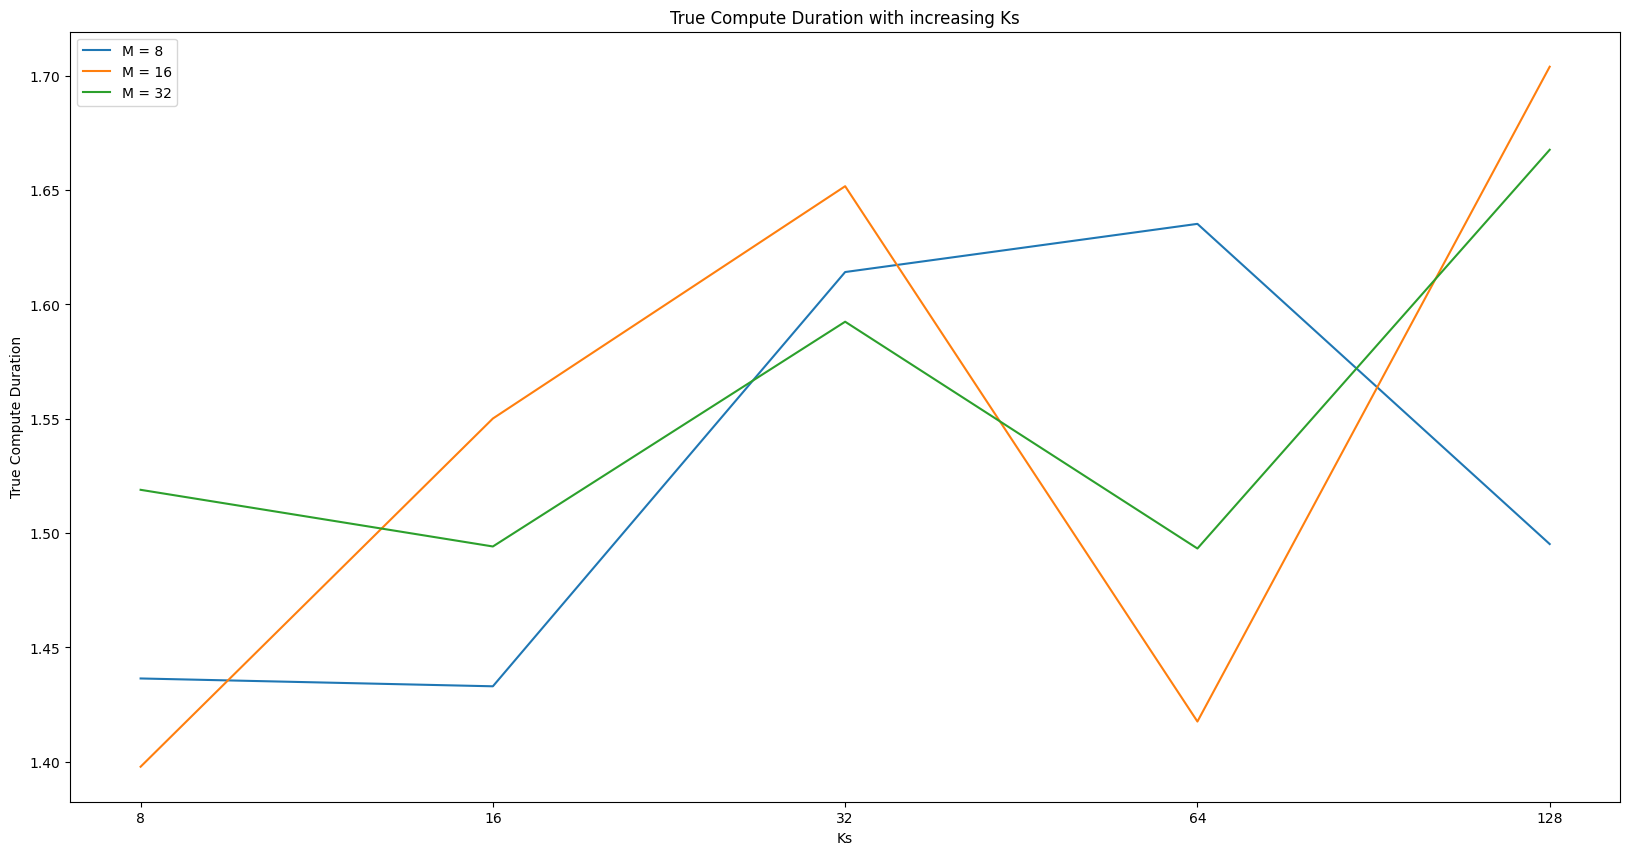

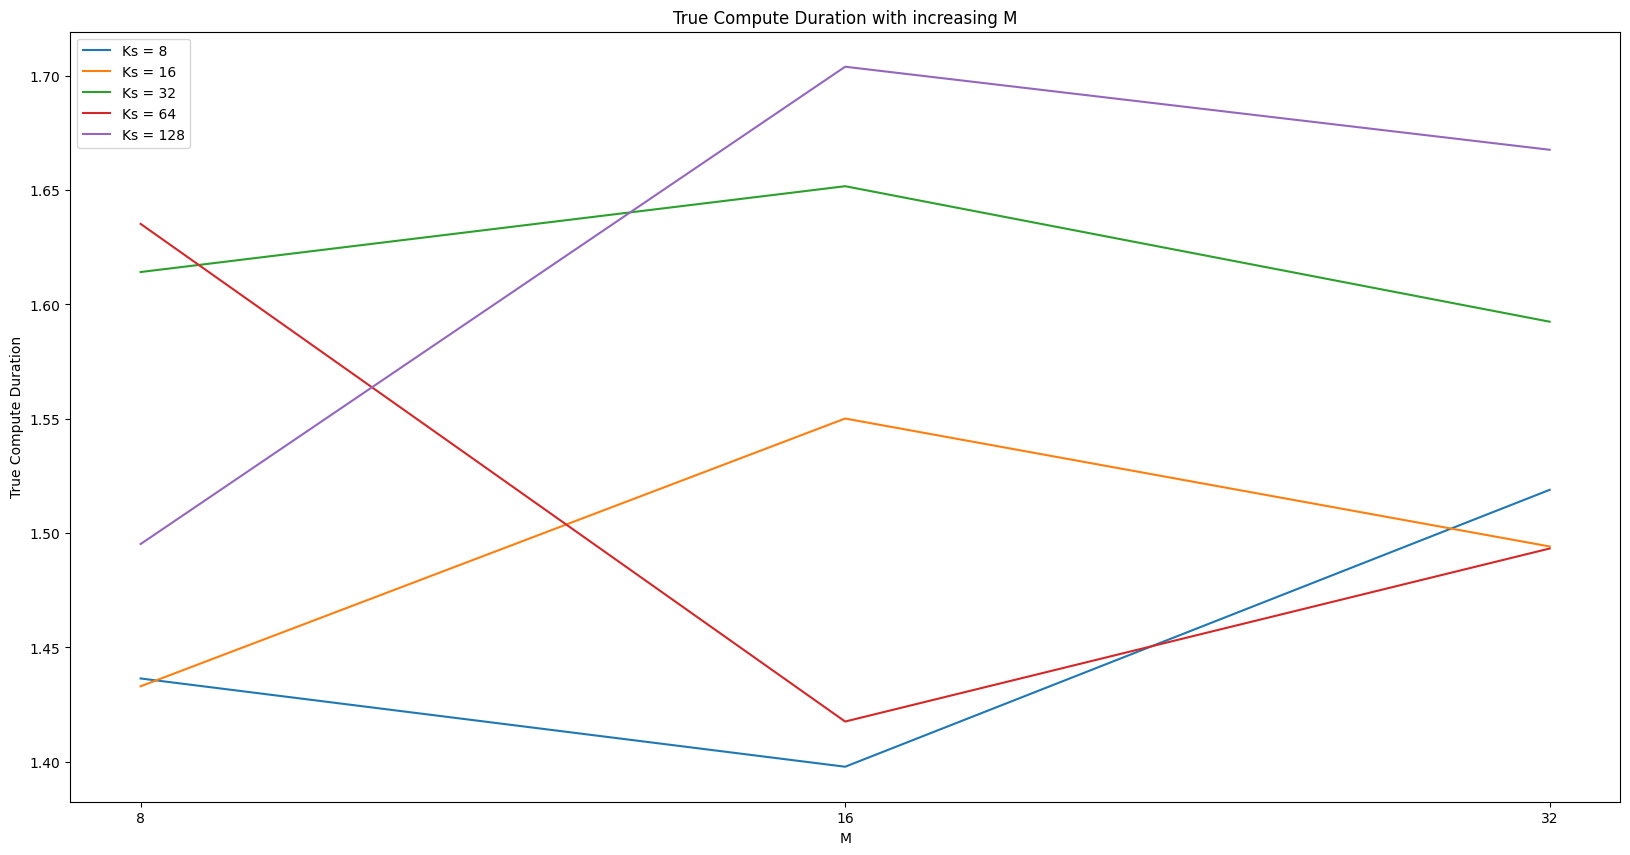

In [245]:
# Plotting with M as Constant and Ks as Variable

# Get the rows where M = 8
compute_time_analysis_df_M8 = compute_time_analysis_df.loc[compute_time_analysis_df['M'] == '8']

# Get the rows where M = 16
compute_time_analysis_df_M16 = compute_time_analysis_df.loc[compute_time_analysis_df['M'] == '16']

# Get the rows where M = 32
compute_time_analysis_df_M32 = compute_time_analysis_df.loc[compute_time_analysis_df['M'] == '32']

# Plot the True Compute Duration with increasing Ks with subplot
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(compute_time_analysis_df_M8['Ks'], compute_time_analysis_df_M8['True Compute Duration'], label="M = 8")
ax.plot(compute_time_analysis_df_M16['Ks'], compute_time_analysis_df_M16['True Compute Duration'], label="M = 16")
ax.plot(compute_time_analysis_df_M32['Ks'], compute_time_analysis_df_M32['True Compute Duration'], label="M = 32")
ax.set_xlabel("Ks")
ax.set_ylabel("True Compute Duration")
ax.set_title("True Compute Duration with increasing Ks")
ax.legend()
plt.show()

# Plotting with Ks as Constant and M as Variable

# Get the rows where Ks = 8
compute_time_analysis_df_Ks8 = compute_time_analysis_df.loc[compute_time_analysis_df['Ks'] == '8']

# Get the rows where Ks = 16
compute_time_analysis_df_Ks16 = compute_time_analysis_df.loc[compute_time_analysis_df['Ks'] == '16']

# Get the rows where Ks = 32
compute_time_analysis_df_Ks32 = compute_time_analysis_df.loc[compute_time_analysis_df['Ks'] == '32']

# Get the rows where Ks = 64
compute_time_analysis_df_Ks64 = compute_time_analysis_df.loc[compute_time_analysis_df['Ks'] == '64']

# Get the rows where Ks = 128
compute_time_analysis_df_Ks128 = compute_time_analysis_df.loc[compute_time_analysis_df['Ks'] == '128']

# Plot the True Compute Duration with increasing M with subplot
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(compute_time_analysis_df_Ks8['M'], compute_time_analysis_df_Ks8['True Compute Duration'], label="Ks = 8")
ax.plot(compute_time_analysis_df_Ks16['M'], compute_time_analysis_df_Ks16['True Compute Duration'], label="Ks = 16")
ax.plot(compute_time_analysis_df_Ks32['M'], compute_time_analysis_df_Ks32['True Compute Duration'], label="Ks = 32")
ax.plot(compute_time_analysis_df_Ks64['M'], compute_time_analysis_df_Ks64['True Compute Duration'], label="Ks = 64")
ax.plot(compute_time_analysis_df_Ks128['M'], compute_time_analysis_df_Ks128['True Compute Duration'], label="Ks = 128")
ax.set_xlabel("M")
ax.set_ylabel("True Compute Duration")
ax.set_title("True Compute Duration with increasing M")
ax.legend()
plt.show()



In [243]:
# Accuracy Analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the compute time analysis csv
accuracy_analysis_df = pd.read_csv("PQ/PQ Search Results/accuracy_analysis.csv")

# Create now columns M and Ks and populate them with the values from the PQ Setting column
accuracy_analysis_df['M'] = 0
accuracy_analysis_df['Ks'] = 0

# Iterate through the dataframe and populate the M and Ks columns
for index, row in accuracy_analysis_df.iterrows():
    pq_setting = row['PQ Setting']
    pq_setting = pq_setting.split("_")
    accuracy_analysis_df.at[index, 'M'] = pq_setting[1]
    accuracy_analysis_df.at[index, 'Ks'] = pq_setting[2]
    
# print(compute_time_analysis_df.head())
accuracy_analysis_df.head()



,PQ Setting,Accuracy,M,Ks
0,pq_8_8,0.100485,8,8
1,pq_8_16,0.068127,8,16
2,pq_8_32,0.041291,8,32
3,pq_8_64,0.027000,8,64
4,pq_8_128,0.015568,8,128


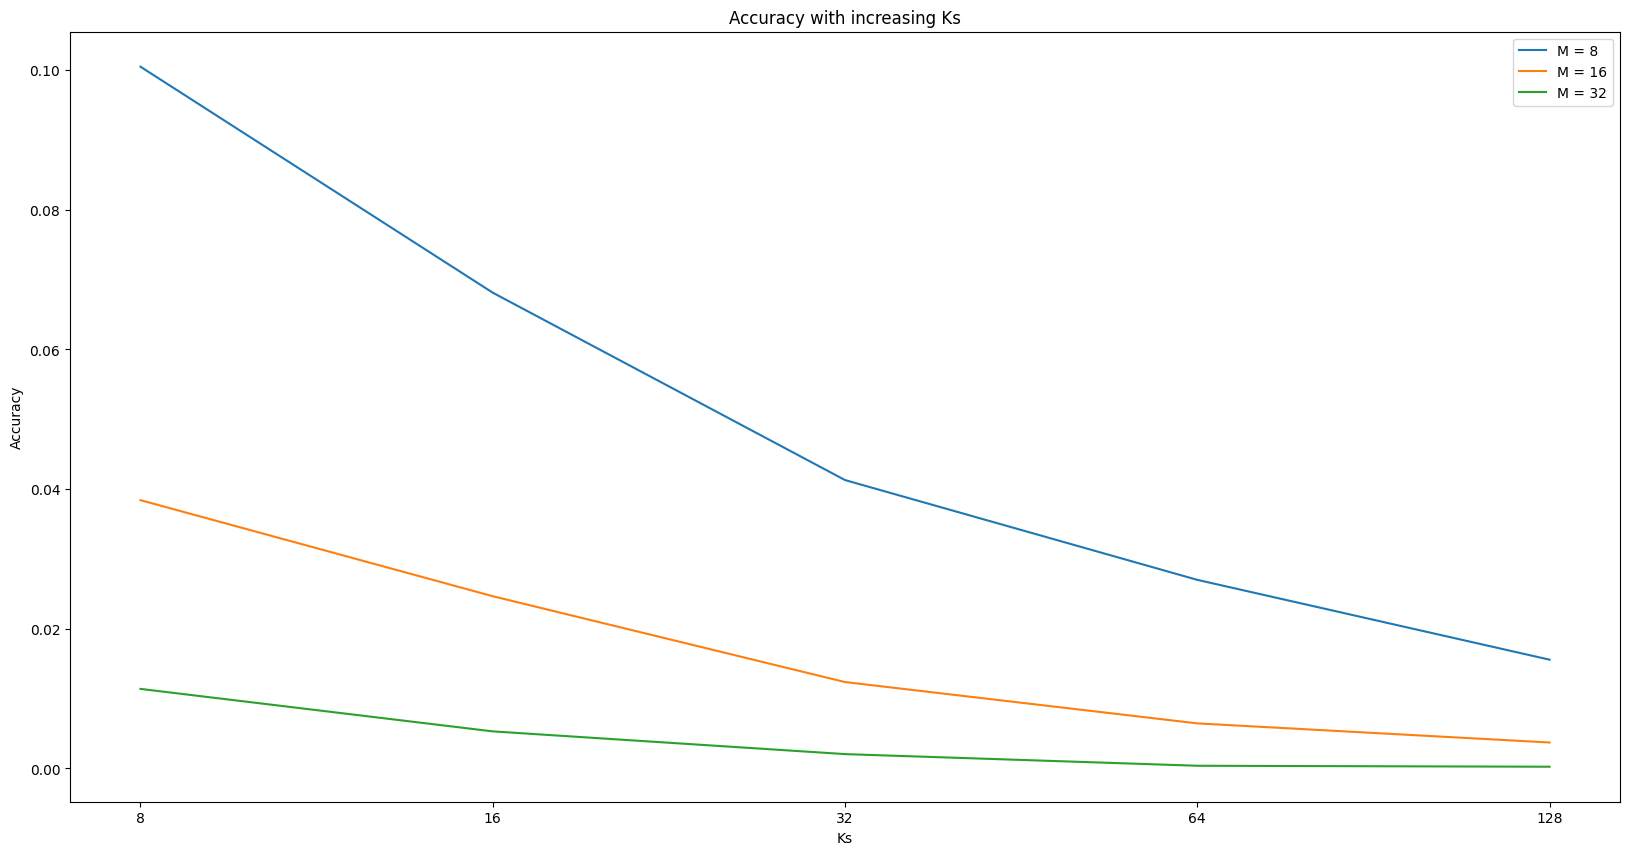

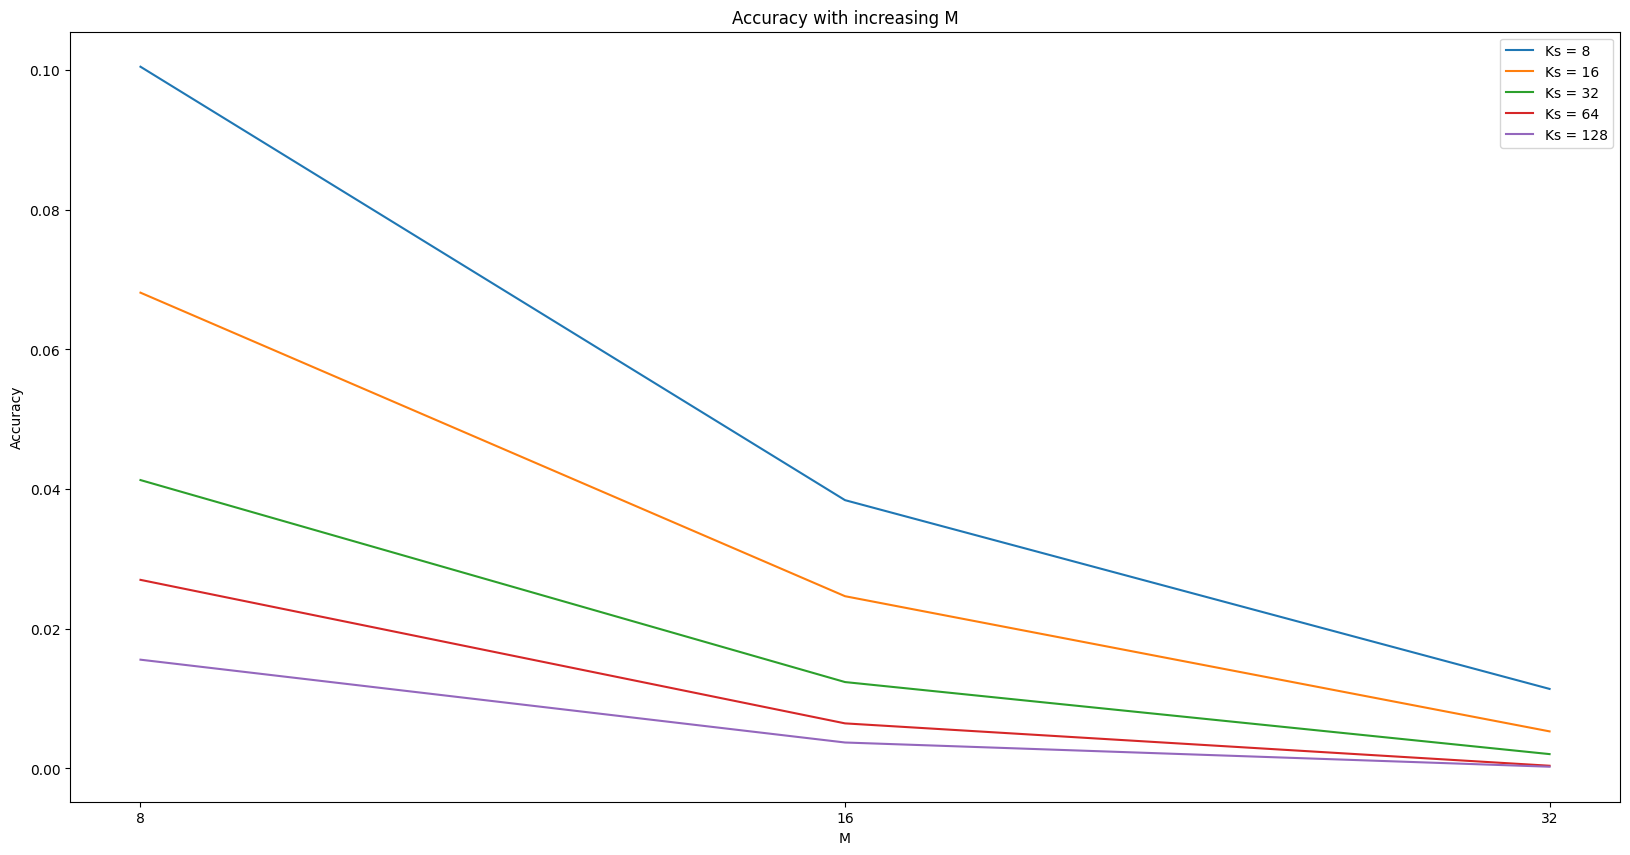

In [246]:
# Plotting with M as Constant and Ks as Variable

# Get the rows where M = 8
accuracy_analysis_df_M8 = accuracy_analysis_df.loc[accuracy_analysis_df['M'] == '8']

# Get the rows where M = 16
accuracy_analysis_df_M16 = accuracy_analysis_df.loc[accuracy_analysis_df['M'] == '16']

# Get the rows where M = 32
accuracy_analysis_df_M32 = accuracy_analysis_df.loc[accuracy_analysis_df['M'] == '32']

# Plot the True Compute Duration with increasing Ks with subplot
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(accuracy_analysis_df_M8['Ks'], accuracy_analysis_df_M8['Accuracy'], label="M = 8")
ax.plot(accuracy_analysis_df_M16['Ks'], accuracy_analysis_df_M16['Accuracy'], label="M = 16")
ax.plot(accuracy_analysis_df_M32['Ks'], accuracy_analysis_df_M32['Accuracy'], label="M = 32")
ax.set_xlabel("Ks")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy with increasing Ks")
ax.legend()
plt.show()

# Plotting with Ks as Constant and M as Variable

# Get the rows where Ks = 8
accuracy_analysis_df_Ks8 = accuracy_analysis_df.loc[accuracy_analysis_df['Ks'] == '8']

# Get the rows where Ks = 16
accuracy_analysis_df_Ks16 = accuracy_analysis_df.loc[accuracy_analysis_df['Ks'] == '16']

# Get the rows where Ks = 32
accuracy_analysis_df_Ks32 = accuracy_analysis_df.loc[accuracy_analysis_df['Ks'] == '32']

# Get the rows where Ks = 64
accuracy_analysis_df_Ks64 = accuracy_analysis_df.loc[accuracy_analysis_df['Ks'] == '64']

# Get the rows where Ks = 128
accuracy_analysis_df_Ks128 = accuracy_analysis_df.loc[accuracy_analysis_df['Ks'] == '128']

# Plot the True Compute Duration with increasing M with subplot
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(accuracy_analysis_df_Ks8['M'], accuracy_analysis_df_Ks8['Accuracy'], label="Ks = 8")
ax.plot(accuracy_analysis_df_Ks16['M'], accuracy_analysis_df_Ks16['Accuracy'], label="Ks = 16")
ax.plot(accuracy_analysis_df_Ks32['M'], accuracy_analysis_df_Ks32['Accuracy'], label="Ks = 32")
ax.plot(accuracy_analysis_df_Ks64['M'], accuracy_analysis_df_Ks64['Accuracy'], label="Ks = 64")
ax.plot(accuracy_analysis_df_Ks128['M'], accuracy_analysis_df_Ks128['Accuracy'], label="Ks = 128")
ax.set_xlabel("M")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy with increasing M")
ax.legend()
plt.show()
